# **Google Playstore Apps Analysis**
**Author Name**: <span style="font-size: 35px ; font-weight: bold;">Muhammad Danish Mirza</span>\
**Email**: danimirza55555@gmail.com

### **Description of Dataset** 
> The dataset is downloaded from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

### **About the Dataset**
##### **Context**
- While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

##### **Content**
- Each app (row) has values for catergory, rating, size, and more.

##### **Acknowledgements**
- This information is scraped from the Google Play Store. This app information would not be available without it.

# **Features**
| Coloumn Name       | Description                                                                                 |
|--------------------|---------------------------------------------------------------------------------------------|
| **App**            | The name of the application.                                                                |
| **Category**       | The category to which the app belongs (e.g., ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY).  |
| **Rating**         | The average user rating of the app (on a scale from 1 to 5).                               |
| **Reviews**        | The total number of user reviews for the app.                                              |
| **Size**           | The size of the app (e.g., in megabytes).                                                 |
| **Installs**       | The number of times the app has been installed (e.g., "10,000+", "1,000,000+").           |
| **Type**           | Indicates whether the app is free or paid.                                                 |
| **Price**          | The price of the app (if it is a paid app).                                               |
| **Content Rating** | The audience the app is suitable for (e.g., Everyone, Teen).                              |
| **Genres**         | The genre(s) of the app, which may include multiple genres separated by semicolons.        |
| **Last Updated**   | The date when the app was last updated.                                                  |
| **Current Ver**    | The current version of the app.                                                            |
| **Android Ver**    | The minimum Android version required to run the app.                                      |

# Importing Libraries

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [241]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [242]:
playstore = pd.read_csv('Data/googleplaystore.csv')

In [243]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [244]:
playstore.shape

(10841, 13)

In [245]:
print(f"The number of rows in the dataset is {playstore.shape[0]} and the number of columns is {playstore.shape[1]}")

The number of rows in the dataset is 10841 and the number of columns is 13


In [246]:
playstore.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          2
Category             1
Type                 1
Genres               1
Size                 0
App                  0
Reviews              0
Content Rating       0
Price                0
Installs             0
Last Updated         0
dtype: int64

In [247]:
playstore.isnull().sum()/len(playstore) * 100

App                0.000000
Category           0.009224
Rating            13.596532
Reviews            0.000000
Size               0.000000
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.000000
Genres             0.009224
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.018448
dtype: float64

<Axes: >

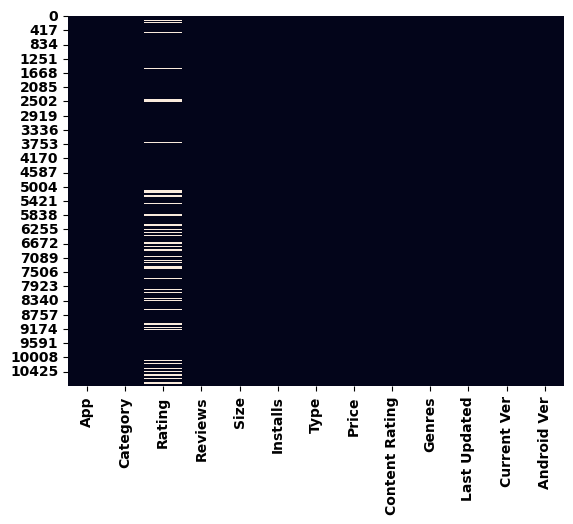

In [248]:
sns.heatmap(playstore.isnull(), cbar=False)

In [249]:
playstore.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [250]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observation No 1**
1. The dataset has 10841 rows and 13 columns.
2. The columns are of different data types
3. The columns in the datasets are:
   - ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver']
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - 'Size', 'Installs', 'Price'


In [251]:
playstore.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


# **Observations No 2**

- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

In [252]:
a = playstore['Size'].unique()
a

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [253]:
playstore['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
3.4M                    65
2.8M                    65
32M                     63
3.7M                    63
34M                     63
3.9M                    62
3.0M                   

In [254]:
print(playstore['Size'].loc[playstore['Size'].str.contains('M')].value_counts().sum())

8830


In [255]:
print(playstore['Size'].loc[playstore['Size'].str.contains('k')].value_counts().sum())

316


In [256]:
print(playstore['Size'].loc[playstore['Size']=="Varies with device"].value_counts().sum())

1695


In [257]:
8830+316+1695

10841

In [258]:
len(playstore)

10841

- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.

In [259]:
def convert_size(size):
    if size == 'Varies with device':
        return np.nan
    elif 'M' in size:
        return float(size.replace('M', '')) *1024 *1024
    elif 'k' in size:
        return float(size.replace('k', '')) * 1024
    else:
        return np.nan
playstore['Size in bytes'] = playstore['Size'].apply(convert_size)


In [260]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in bytes
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19922944.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,9122611.2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,26214400.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2936012.8


In [261]:
playstore['Size in Mb'] = playstore['Size in bytes'].apply(lambda x: x/(1024*1024))

In [262]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in bytes,Size in Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19922944.0,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,9122611.2,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,26214400.0,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2936012.8,2.8


- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

In [263]:
playstore['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

> Now we remove the `+` and `,` from the installs and convert them into numeric data type.

In [264]:
playstore['Installs'] = playstore['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)

In [265]:
playstore['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [266]:
playstore['Installs'] = playstore['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)

In [267]:
playstore['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [268]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in bytes,Size in Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19922944.0,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,9122611.2,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,26214400.0,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2936012.8,2.8


In [269]:
playstore['Installs'] = playstore['Installs'].apply(lambda x: int(x))

> Now we have converted the `Installs` column into numeric data type.\
> Now we create a new cloumn named installs_range which will have the range of installs in which the app falls.


In [270]:
playstore['Installs'].dtype

dtype('int64')

In [271]:
playstore['Installs'].max() 

np.int64(1000000000)

In [272]:
bins = [-1,0, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
labels = ['No installs', 'Very low', 'Low', 'Moderate', 'High', 'Very high', 'Extremely high']
playstore['Installs_category'] = pd.cut(playstore['Installs'], bins=bins, labels=labels)

In [273]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in bytes,Size in Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19922944.0,19.0,Very low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0,14.0,Moderate
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,9122611.2,8.7,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,26214400.0,25.0,Very high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2936012.8,2.8,Low


In [274]:
playstore['Installs_category'].value_counts()

Installs_category
Very low          4228
Moderate          2118
High              2004
Low               1648
Very high          698
Extremely high     130
No installs         15
Name: count, dtype: int64

In [275]:
playstore['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [276]:
playstore['Price'] = playstore['Price'].apply(lambda x: x.replace('$', '') if '$' in str(x) else x)

In [277]:
playstore['Price'] = playstore['Price'].apply(lambda x: float(x))

In [278]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size in bytes,Size in Mb,Installs_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19922944.0,19.0,Very low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14680064.0,14.0,Moderate
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,9122611.2,8.7,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,26214400.0,25.0,Very high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2936012.8,2.8,Low


In [279]:
print(f"Min price is: {playstore['Price'].min()} $")
print(f"Max price is: {playstore['Price'].max()} $")
print(f"Average price is: {playstore['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0272733142699015 $


> Now we remove the duplicate values from the dataset.

In [280]:
playstore.duplicated().sum()

np.int64(483)

In [281]:
playstore['App'].duplicated().sum()

np.int64(1181)

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [282]:
for col in playstore.columns:
    print(f"Number of duplicates in {col} column are: {playstore[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10807
Number of duplicates in Rating column are: 10801
Number of duplicates in Reviews column are: 4840
Number of duplicates in Size column are: 10380
Number of duplicates in Installs column are: 10821
Number of duplicates in Type column are: 10838
Number of duplicates in Price column are: 10749
Number of duplicates in Content Rating column are: 10835
Number of duplicates in Genres column are: 10721
Number of duplicates in Last Updated column are: 9464
Number of duplicates in Current Ver column are: 8009
Number of duplicates in Android Ver column are: 10807
Number of duplicates in Size in bytes column are: 10381
Number of duplicates in Size in Mb column are: 10381
Number of duplicates in Installs_category column are: 10834


> - There are 1181 duplicates in the `App` column so we can remove them.


In [283]:
Duplicate_app_name = playstore[playstore['App'].duplicated(keep=False)].sort_values(by='App')
Duplicate_app_name.to_excel('Data/Duplicate_app_name.xlsx', index=False)

In [284]:
print(f"Number of rows before removing duplicates: {playstore.shape[0]}")

Number of rows before removing duplicates: 10841


In [285]:
# remove the duplicates from the dataset
playstore.drop_duplicates(subset='App', inplace=True)

In [286]:
print(f"Number of rows after removing duplicates: {playstore.shape[0]}")

Number of rows after removing duplicates: 9660


In [287]:
playstore['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [288]:
playstore['Category'].value_counts()

Category
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64

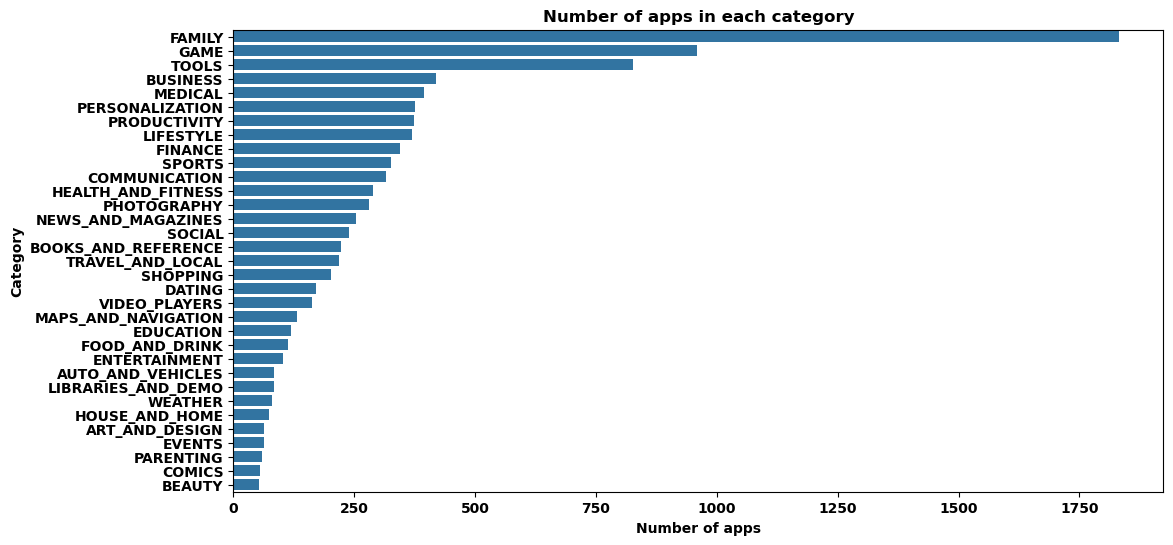

In [289]:
# plot the graph of category and no of apps
plt.figure(figsize=(12,6))
sns.countplot(y=playstore['Category'], order = playstore['Category'].value_counts().index)
plt.xlabel('Number of apps')
plt.title('Number of apps in each category')
plt.show()

# **Observations No 3**
As shown from the above reading and graphs, we can see that:
- There are 33 unique categories in the dataset.
- The most common category is `FAMILY` with 1832 apps.
- The second most common category is `GAME` with 959 apps.
- The third most common category is `TOOLS` with 827 apps.
- The fourth most common category is `BUSINESS` with 420 apps.
- The fifth most common category is `MEDICAL` with 395 apps.
- The sixth most common category is `PERSONALIZATION` with 376 apps.
- The seventh most common category is `PRODUCTIVITY` with 374 apps.
- The eighth most common category is `LIFESTYLE` with 369 apps.
- The ninth most common category is `FINANCE` with 345 apps.
- The tenth most common category is `SPORTS` with 325 apps.
- The least common category is `BEAUTY` with 53 apps.


In [290]:
playstore['Installs_category'].value_counts()

Installs_category
Very low          4164
Moderate          1922
Low               1581
High              1544
Very high          390
Extremely high      44
No installs         15
Name: count, dtype: int64

In [291]:
playstore.groupby("Reviews")["Rating"].mean().sort_index(ascending = False)

Reviews
78158306    4.100000
69119316    4.400000
66577313    4.500000
56642847    4.000000
44891723    4.600000
42916526    4.700000
27722264    4.500000
25655305    4.300000
24900999    4.700000
23133508    4.600000
22426677    4.400000
17712922    4.500000
17014787    4.000000
16771865    4.600000
14891223    4.500000
14198297    4.500000
13479633    4.500000
12842860    4.300000
12759663    4.500000
11667403    4.300000
11334799    4.300000
10979062    4.600000
10858556    4.500000
10790289    4.200000
10485308    4.300000
10484169    4.100000
10424925    4.100000
10216538    4.500000
10055521    4.500000
10053186    4.500000
9882639     4.600000
9881829     4.500000
9879473     4.600000
9642995     4.300000
9235155     4.300000
8923587     4.400000
8606259     4.300000
8389714     4.500000
8219586     4.400000
8190074     4.500000
8118880     4.700000
8118609     4.300000
8033493     4.400000
7820209     4.500000
7790693     4.600000
7671249     4.600000
7614130     4.400000
75945

In [292]:
playstore.groupby("Rating")["Reviews"].mean().sort_index(ascending = False)

Rating
5.0         8.797048
4.9     22832.223529
4.8     94469.266968
4.7    312895.653846
4.6    478541.330893
4.5    597865.560142
4.4    442040.046927
4.3    341366.995541
4.2    152684.329630
4.1    216604.969404
4.0    195330.982456
3.9     31884.821727
3.8     37068.031469
3.7     36350.897321
3.6      9886.353293
3.5      9949.544872
3.4      7553.380952
3.3     15488.930000
3.2      3601.793651
3.1      4649.797101
3.0      1993.493827
2.9      1287.488889
2.8      3118.250000
2.7      1089.043478
2.6       156.708333
2.5       740.350000
2.4       780.473684
2.3       118.050000
2.2       141.357143
2.1       384.125000
2.0       249.750000
1.9       157.750000
1.8       427.250000
1.7       295.000000
1.6       172.750000
1.5        20.333333
1.4        32.666667
1.2        44.000000
1.0         1.750000
Name: Reviews, dtype: float64

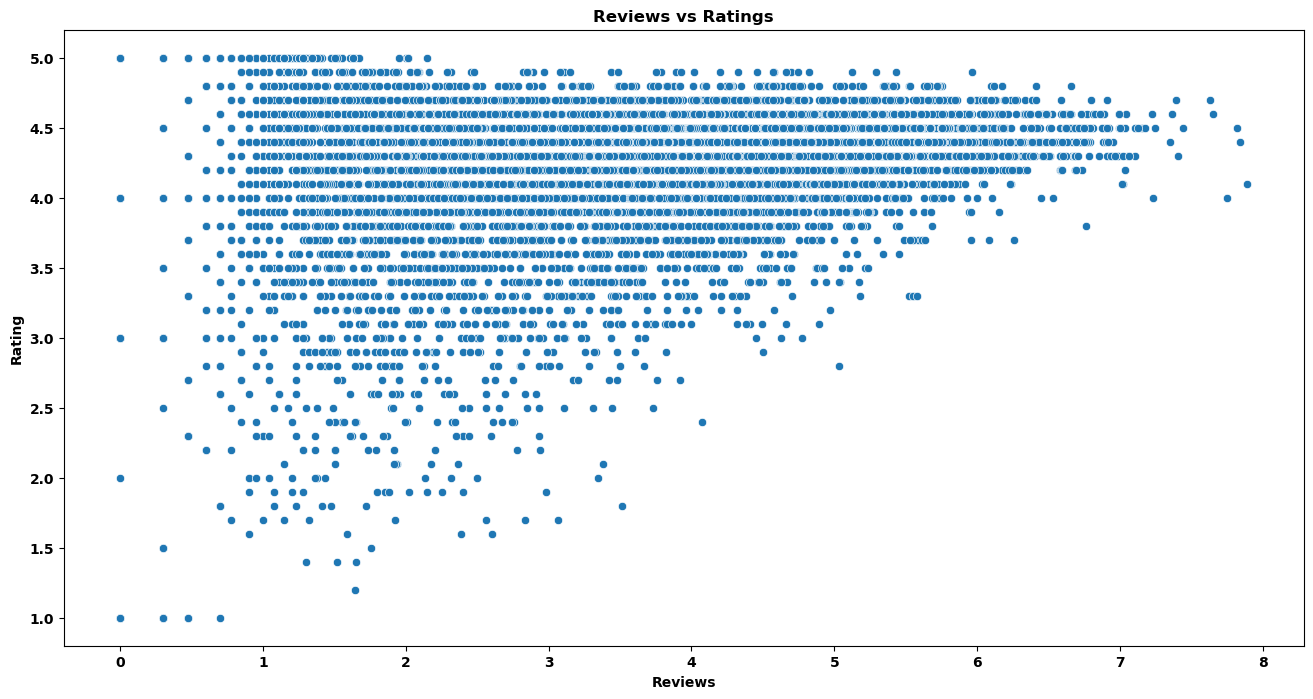

In [293]:
# plot the correlation between reviews and ratings
plt.figure(figsize=(16,8))
sns.scatterplot(x=np.log10(playstore['Reviews']), y='Rating', data=playstore)
plt.title('Reviews vs Ratings')
plt.show()

# **Observations No 4**

- The scatter plot of Reviews vs. Ratings, there appears to be a positive correlation between the number of reviews and the app ratings. As the number of reviews increases, the app ratings tend to be higher overall.

- The plot shows a concentration of data points in the upper-right quadrant, indicating that apps with `**more reviews generally have higher ratings**`. There is a noticeable trend where the density of data points is higher towards the top-right corner, suggesting that apps with more reviews are more likely to have better ratings.

- However, the relationship is not perfectly linear, as `there are also apps with low ratings that have a high number of reviews, and vice versa`. This indicates that while the number of reviews is a factor in determining ratings, there are likely other variables that also influence the app rating.

- Overall, the visual pattern suggests that the more reviews an app receives, the higher its rating tends to be, but there are exceptions and other factors that contribute to the final app rating.

In [294]:
playstore.groupby('Category')['Size in Mb'].mean().sort_values(ascending=False)

Category
GAME                   41.866570
FAMILY                 27.187747
TRAVEL_AND_LOCAL       24.204375
SPORTS                 24.058153
ENTERTAINMENT          23.043750
PARENTING              22.512963
HEALTH_AND_FITNESS     20.669296
FOOD_AND_DRINK         20.494318
AUTO_AND_VEHICLES      20.036807
MEDICAL                19.188756
EDUCATION              19.056816
FINANCE                17.367863
MAPS_AND_NAVIGATION    16.367773
SOCIAL                 15.983868
HOUSE_AND_HOME         15.970010
VIDEO_PLAYERS          15.792612
PHOTOGRAPHY            15.666053
DATING                 15.661117
SHOPPING               15.490994
LIFESTYLE              14.844516
EVENTS                 13.963617
BUSINESS               13.866891
BEAUTY                 13.795745
COMICS                 13.794456
BOOKS_AND_REFERENCE    13.134057
WEATHER                12.679792
NEWS_AND_MAGAZINES     12.470153
ART_AND_DESIGN         12.370968
PRODUCTIVITY           12.341952
COMMUNICATION          11.306306
P

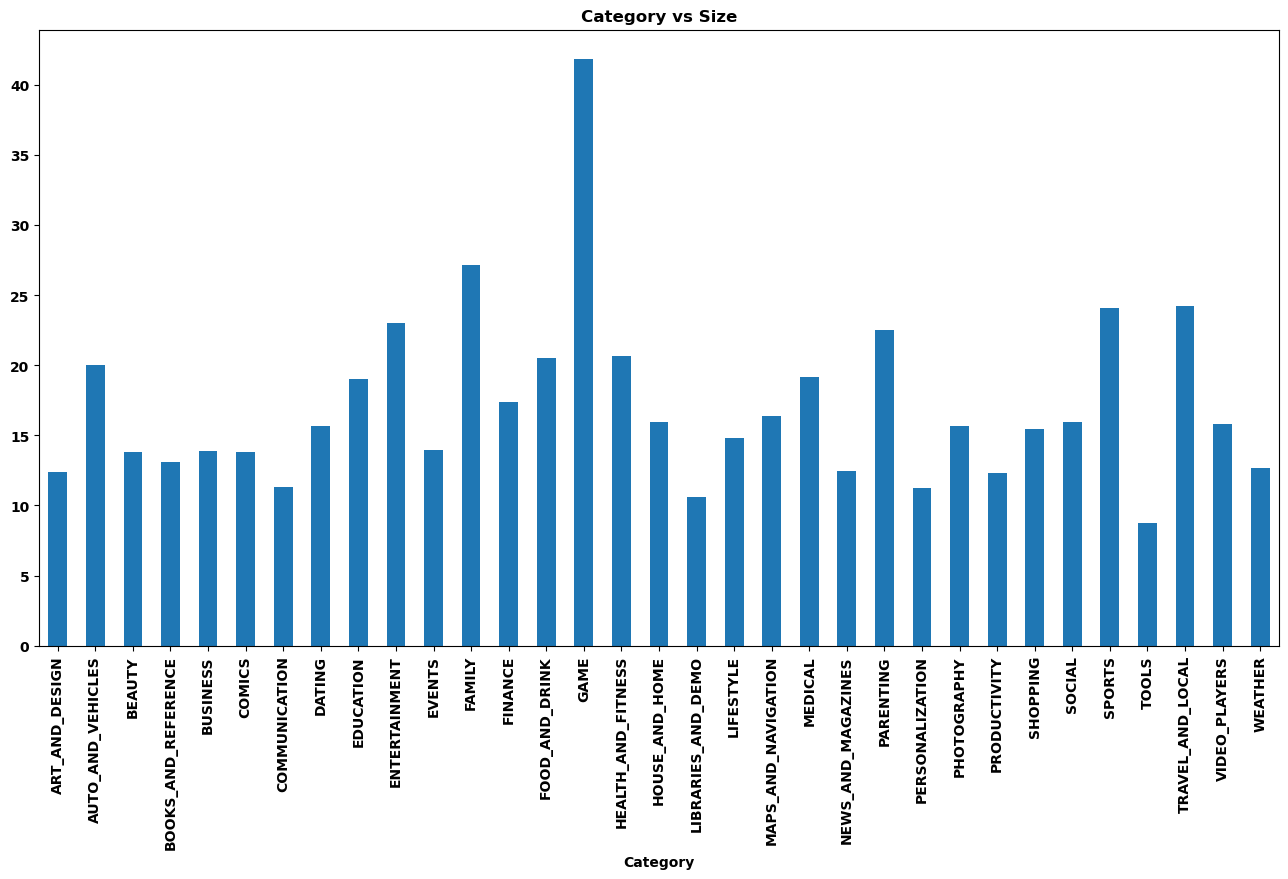

In [295]:
# plot a graph of category vs size
plt.figure(figsize=(16,8))
playstore.groupby('Category')['Size in Mb'].mean().plot(kind='bar')
plt.title('Category vs Size')
plt.show()

# **Observations No 5**
From the above graph, we can see that:
The top five most space taking categories are:
| **Category**          | **Size (in MB)**|
|-------------------|------------|
|GAME               |41.866570 MB|
|FAMILY             |27.187747 MB|
|TRAVEL_AND_LOCAL   |24.204375 MB|
|SPORTS             |24.058153 MB|
|ENTERTAINMENT      |23.043750 MB|
The least five most space taking categories are:
| **Category**          | **Size (in MB)**|
|-------------------|------------|
|PRODUCTIVITY       |12.341952 MB|
|COMMUNICATION      |11.306306 MB|
|PERSONALIZATION    |11.223880 MB|
|LIBRARIES_AND_DEMO |10.598851 MB|
|TOOLS              |8.781912 MB|

In [296]:
# What percentage of apps are free versus paid
print(f"Percentage of free apps is: {playstore['Type'].value_counts(normalize=True)[0]*100} %")
print(f"Percentage of paid apps is: {playstore['Type'].value_counts(normalize=True)[1]*100} %")

Percentage of free apps is: 92.17310280567347 %
Percentage of paid apps is: 7.826897194326535 %


In [297]:
playstore['Type'].value_counts()

Type
Free    8903
Paid     756
Name: count, dtype: int64

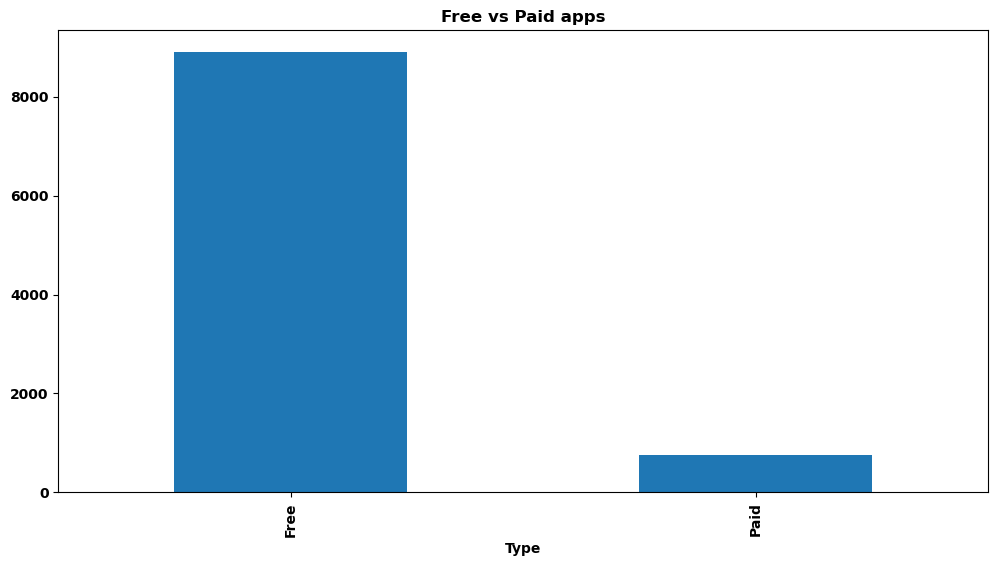

In [298]:
# plot the graph of free vs paid apps
plt.figure(figsize=(12,6))
playstore['Type'].value_counts().plot(kind='bar')
plt.title('Free vs Paid apps')
plt.show()

# **Observations No 6**
From the above graph, we can see that:\
Free apps are more than paid apps in the dataset.\
Percentage of free apps is: 92.17%\
Percentage of paid apps is: 7.82%

In [299]:
# How does the pricing model affect the number of installations?
playstore.groupby('Price')['Installs'].mean()

Price
0.00      8.430545e+06
0.99      1.337060e+05
1.00      3.500000e+03
1.04      5.000000e+01
1.20      1.000000e+04
1.26      1.000000e+02
1.29      1.000000e+03
1.49      6.373022e+03
1.50      1.000000e+03
1.59      1.000000e+04
1.61      1.000000e+03
1.70      1.000000e+03
1.75      5.000000e+01
1.76      5.000000e+01
1.96      1.000000e+01
1.97      1.000000e+04
1.99      5.481001e+04
2.00      1.866667e+02
2.49      6.955324e+04
2.50      1.000000e+04
2.56      1.000000e+03
2.59      1.000000e+04
2.60      5.000000e+01
2.90      1.000000e+05
2.95      1.000000e+04
2.99      8.217760e+04
3.02      1.000000e+02
3.04      1.000000e+01
3.08      1.000000e+03
3.28      1.000000e+04
3.49      3.023000e+04
3.61      1.000000e+01
3.88      1.000000e+02
3.90      1.000000e+04
3.95      1.000000e+05
3.99      2.823247e+04
4.29      1.000000e+03
4.49      4.628889e+04
4.59      1.000000e+02
4.60      5.000000e+03
4.77      5.000000e+04
4.80      1.000000e+01
4.84      1.000000e+03
4.85 

In [300]:
bins = [-1, 0, 1, 5, 10, 20, 50, 100, 200, 400]
labels = ['Free', 'Extremely low(0$-1$)', 'Moderately Low(1$-5$)', 'Moderate(5$-10$)','Moderately high(10$-20$)', 'High(20$-50$)', 'Very high(50$-100$)', 'Expensive(100$-200$)', 'Extremely Expensive(200$-400$)']
playstore['Price_category'] = pd.cut(playstore['Price'], bins=bins, labels=labels)

In [301]:
playstore["Price_category"].value_counts()

Price_category
Free                              8904
Moderately Low(1$-5$)              449
Extremely low(0$-1$)               148
Moderate(5$-10$)                    85
Moderately high(10$-20$)            35
Extremely Expensive(200$-400$)      17
High(20$-50$)                       16
Very high(50$-100$)                  3
Expensive(100$-200$)                 3
Name: count, dtype: int64

In [302]:
playstore.groupby('Price_category')['Installs'].mean()

Price_category
Free                              8.430545e+06
Extremely low(0$-1$)              1.310667e+05
Moderately Low(1$-5$)             4.953371e+04
Moderate(5$-10$)                  1.747110e+05
Moderately high(10$-20$)          1.401657e+04
High(20$-50$)                     1.026538e+04
Very high(50$-100$)               6.700000e+02
Expensive(100$-200$)              3.333333e-01
Extremely Expensive(200$-400$)    1.288824e+04
Name: Installs, dtype: float64

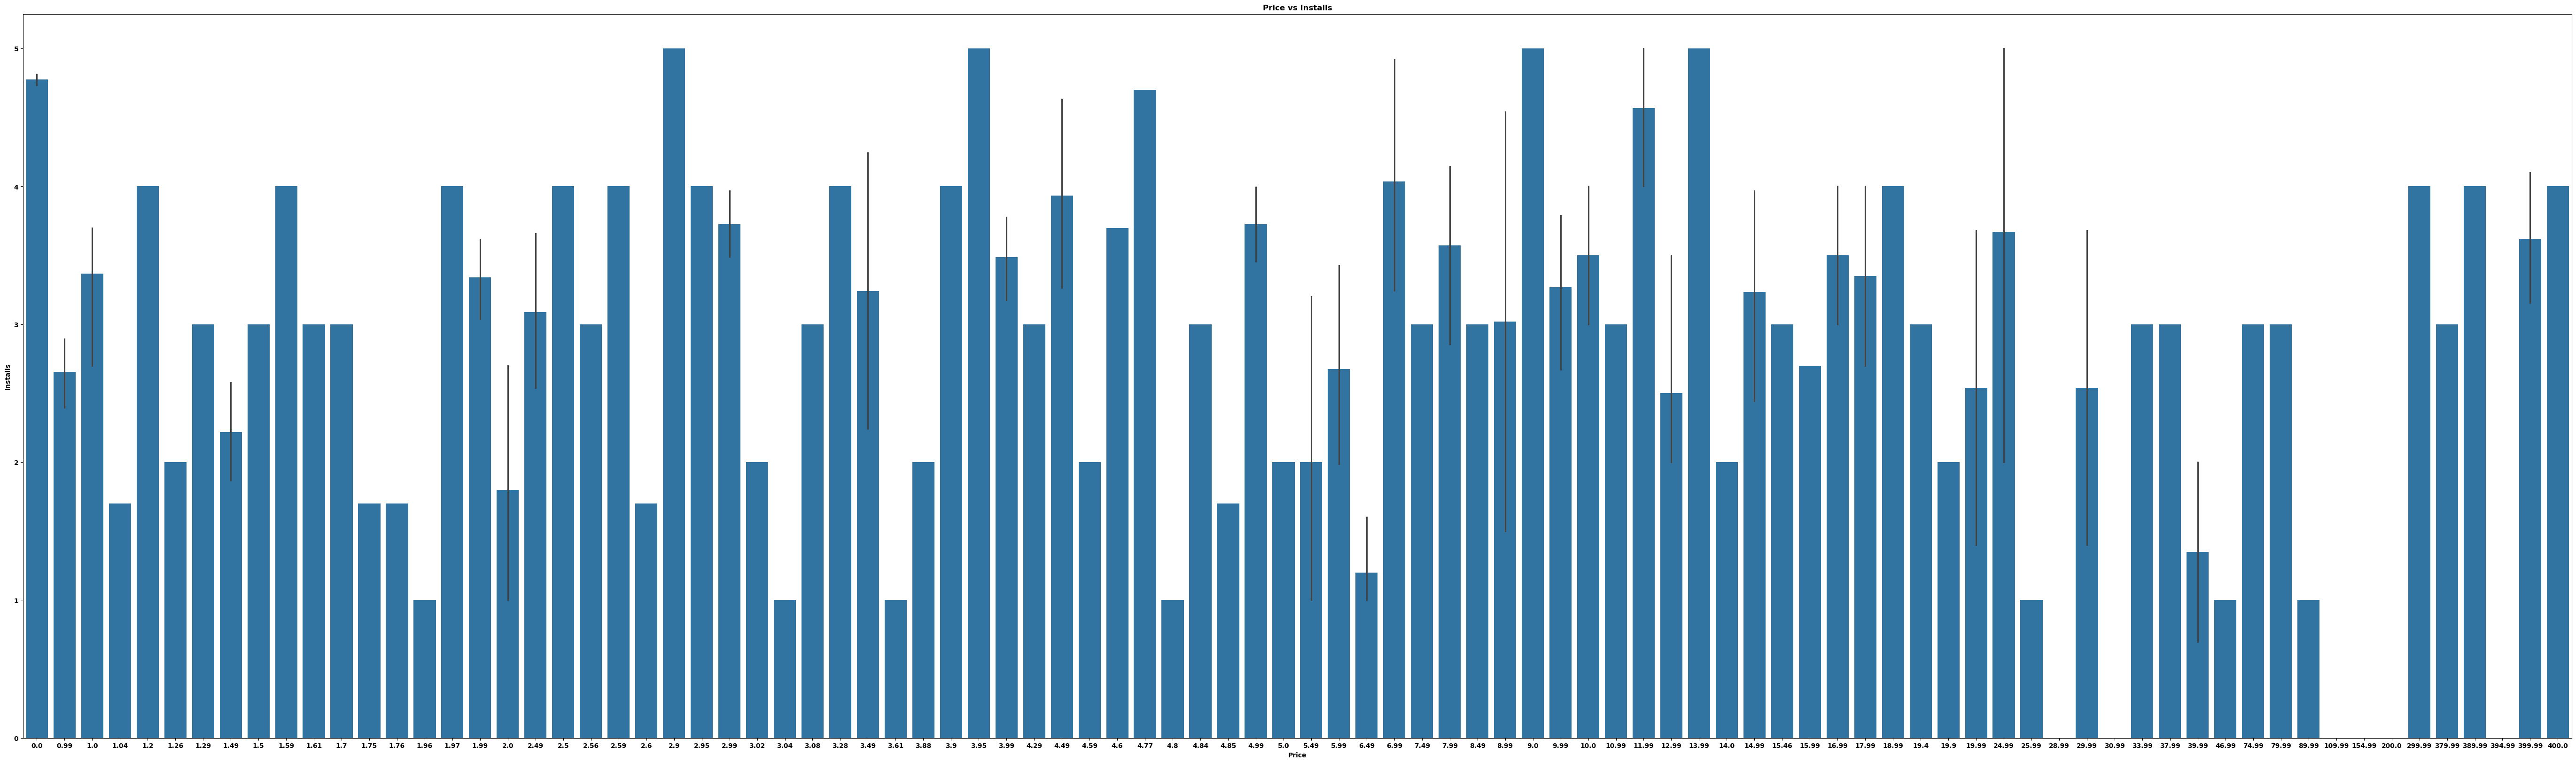

In [303]:
# plot the graph of price_categoty vs installs
plt.figure(figsize=(70, 20))  # make figure size
sns.barplot(x='Price', y=np.log10(playstore['Installs']), data=playstore)
plt.title('Price vs Installs')
plt.show()

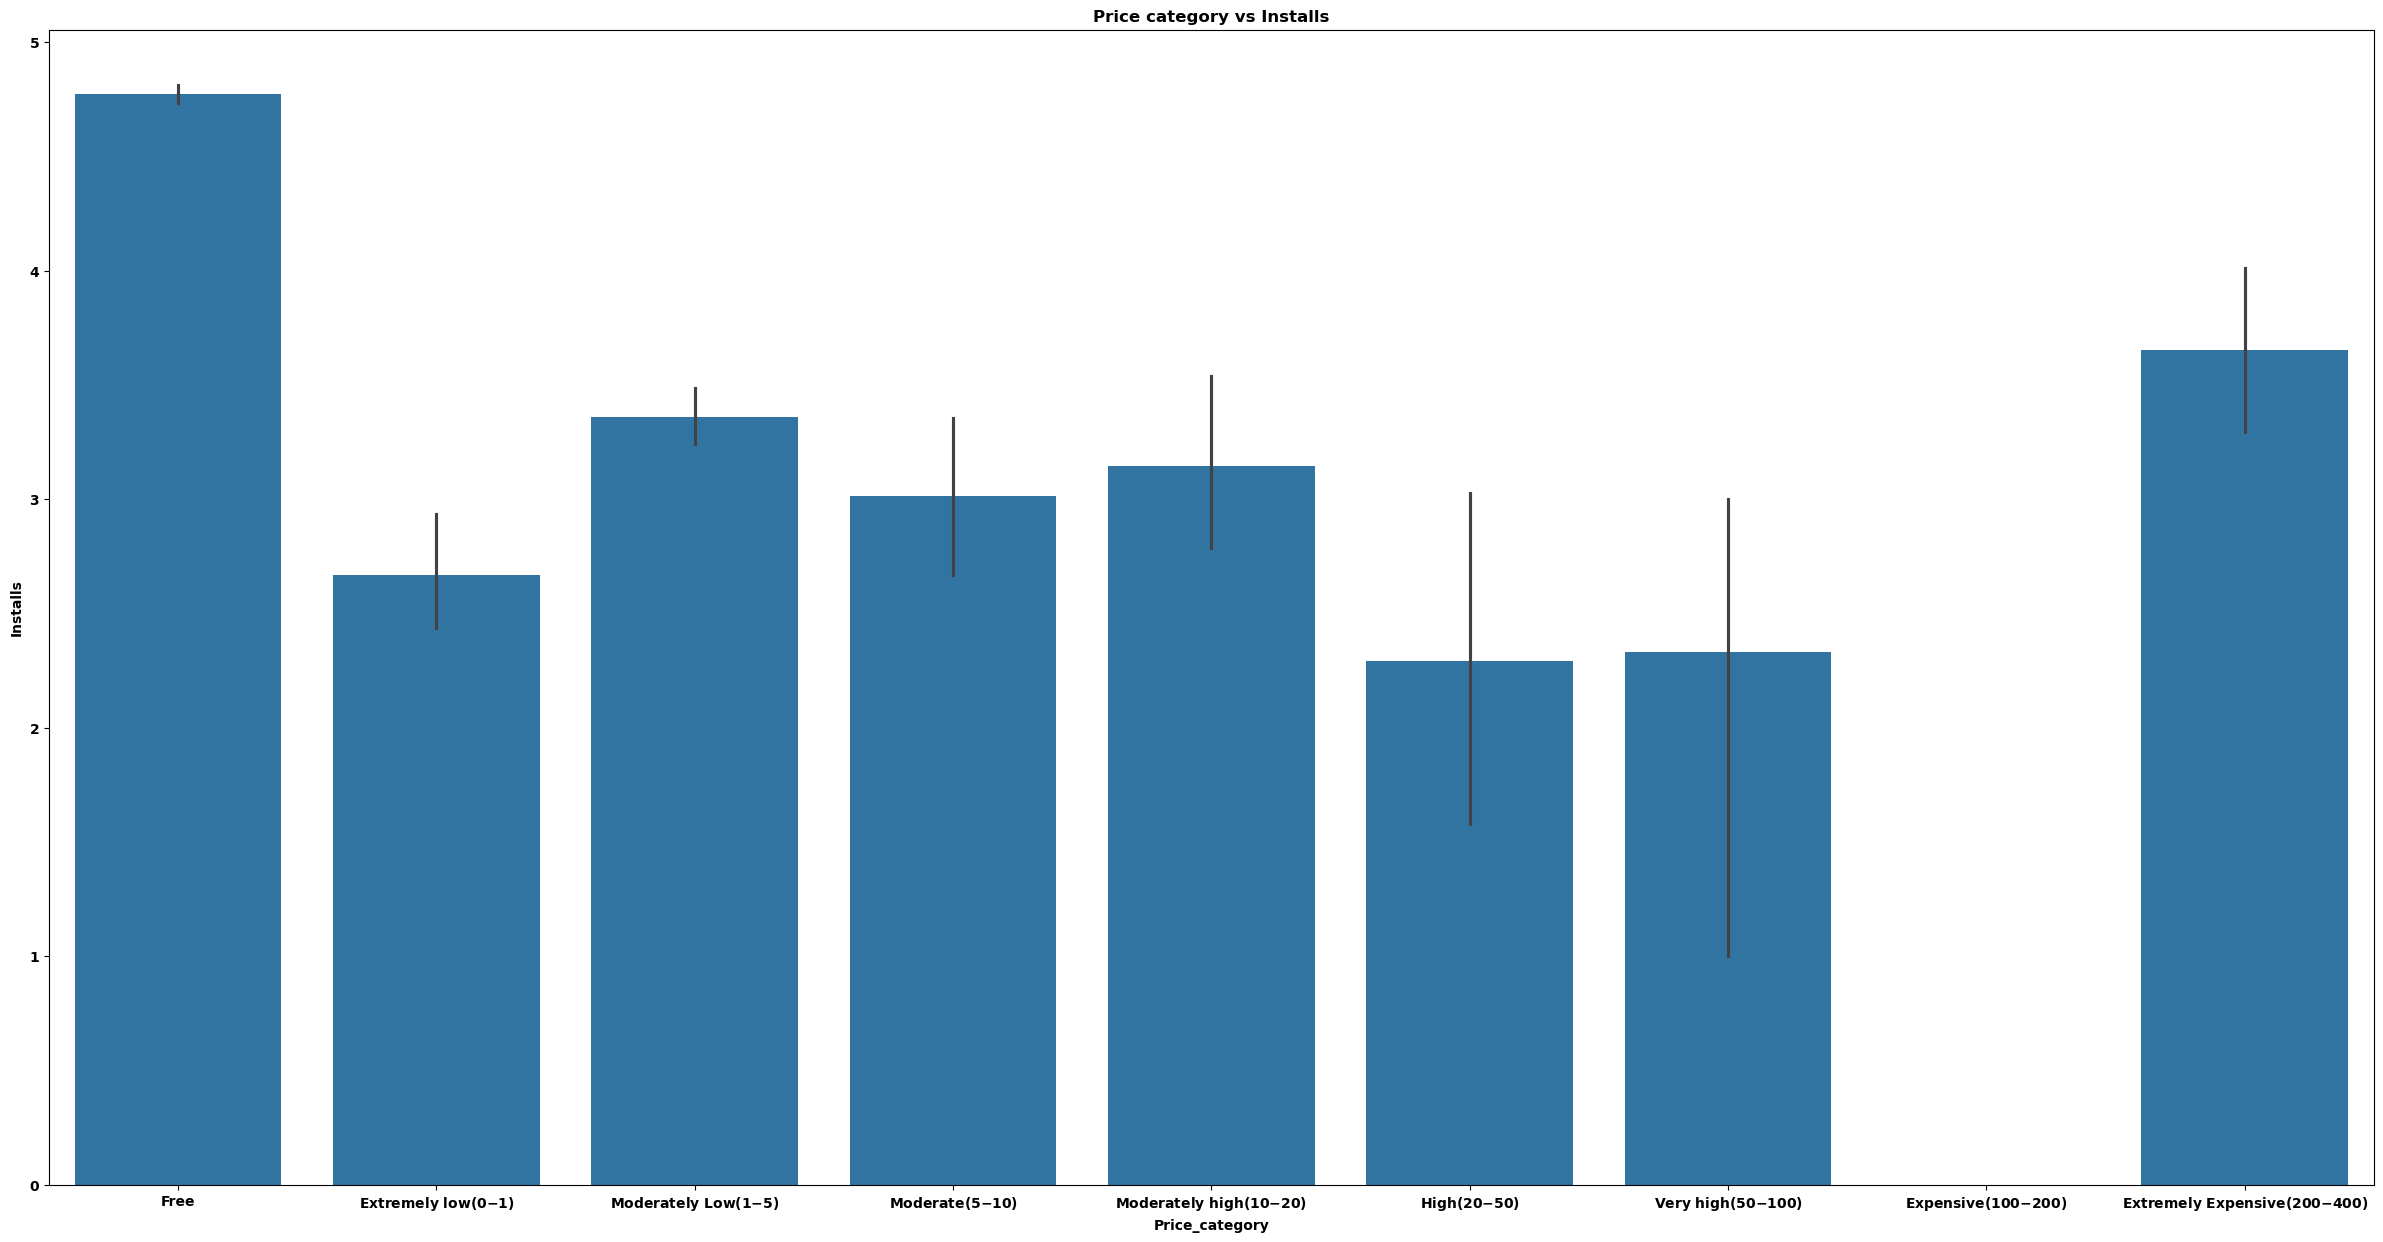

In [304]:
plt.figure(figsize=(30,15))
sns.barplot(x='Price_category', y=np.log10(playstore['Installs']), data=playstore)
plt.title('Price category vs Installs')
plt.show()

# **Observations No 7**
As you can see from the above bar plots Price_category VS Installs
- The apps with higher prices tend to have fewer installs, while the apps with lower prices tend to have more installs.
- The apps with prices between 0 dollars have average 8430545 number of installs.
- The apps with prices between 0 and 1 dollars have average 131066 number of installs.
- The apps with prices between 1 and 5 dollars have average 49533 number of installs.
- The apps with prices between 5 and 10 dollars have average 174711 number of installs.
- The apps with prices between 10 and 20 dollars have average 14016 number of installs.
- The apps with prices between 20 and 50 dollars have average 10265 number of installs.
- The apps with prices between 50 and 100 dollars have average 670 number of installs.
- The apps with prices between 100 and 200 dollars have NO installs.
- The apps with prices between 200 and 400 dollars have average 12888 number of installs.

In [305]:

playstore.groupby('Category')['Content Rating'].value_counts()

Category             Content Rating 
ART_AND_DESIGN       Everyone             60
                     Teen                  3
                     Everyone 10+          1
AUTO_AND_VEHICLES    Everyone             83
                     Everyone 10+          1
                     Teen                  1
BEAUTY               Everyone             45
                     Mature 17+            3
                     Teen                  3
                     Everyone 10+          2
BOOKS_AND_REFERENCE  Everyone            198
                     Teen                 17
                     Everyone 10+          4
                     Mature 17+            3
BUSINESS             Everyone            405
                     Teen                 13
                     Everyone 10+          1
                     Mature 17+            1
COMICS               Everyone             26
                     Teen                 19
                     Mature 17+            6
                  

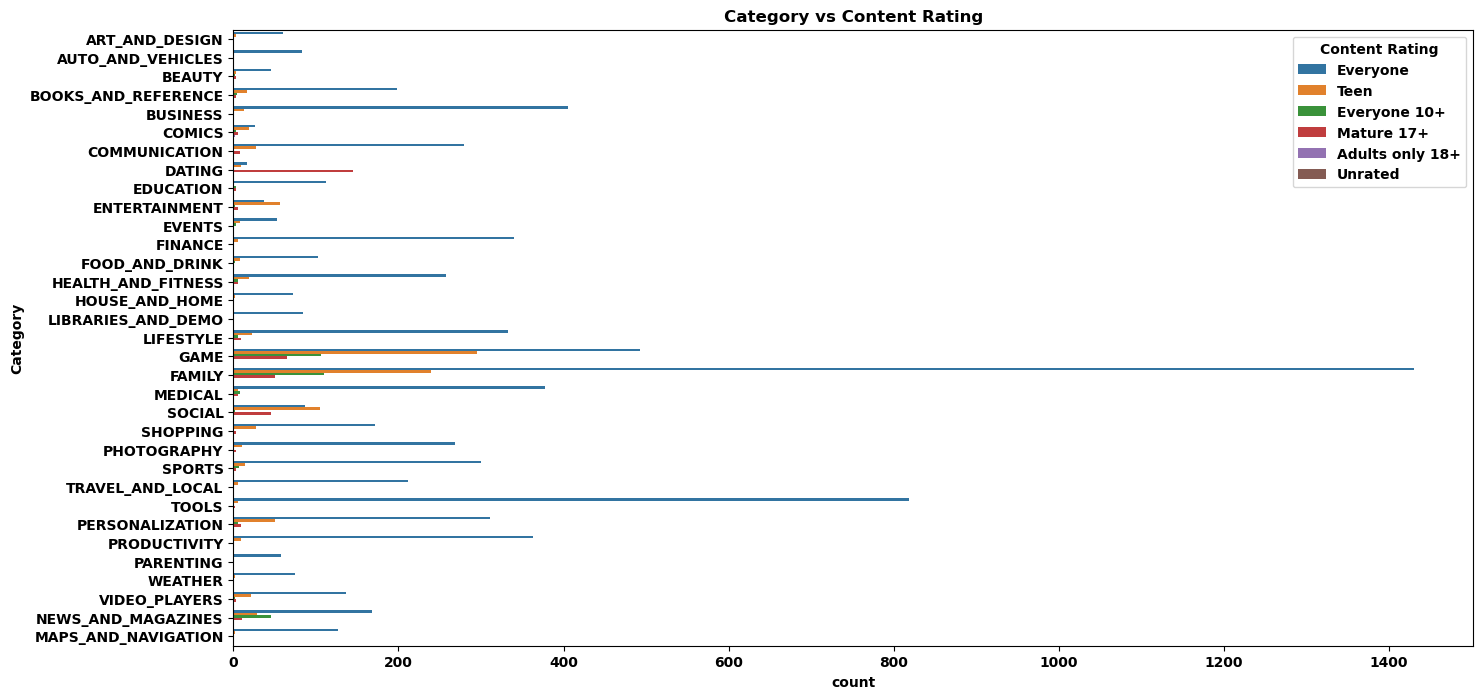

In [306]:
# plot the graph of category vs content rating
plt.figure(figsize=(16,8))
sns.countplot(y=playstore['Category'], hue=playstore['Content Rating'])
plt.title('Category vs Content Rating')
plt.show()

In [307]:
playstore['Content Rating'].value_counts()

Content Rating
Everyone           7904
Teen               1036
Mature 17+          393
Everyone 10+        322
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

# **Observations No 8**
We can see from the above bar plot that:
- The most common content rating is `Everyone` with 7904 apps.
- The second most common content rating is `Teen` with 1036 apps.
- The third most common content rating is `Mature 17+` with 393 apps.
- The fourth most common content rating is `Everyone 10+` with 322 apps.
- The fifth most common content rating is `Adults only 18+` with 3 apps.
- The sixth most common content rating is `Unrated` with 2 apps.

In [308]:
playstore.groupby('Rating')['Installs'].mean().sort_index(ascending = False)

Rating
5.0    3.277601e+02
4.9    3.868541e+05
4.8    1.727262e+06
4.7    5.898810e+06
4.6    9.162858e+06
4.5    1.497431e+07
4.4    1.495052e+07
4.3    1.789993e+07
4.2    1.114386e+07
4.1    7.751920e+06
4.0    7.549591e+06
3.9    8.168371e+06
3.8    2.115918e+06
3.7    7.071652e+06
3.6    1.416268e+06
3.5    1.481270e+06
3.4    8.604282e+05
3.3    9.484680e+05
3.2    4.535619e+05
3.1    1.544326e+06
3.0    4.226405e+05
2.9    1.598022e+05
2.8    8.722875e+04
2.7    1.460739e+05
2.6    1.844167e+04
2.5    1.039050e+05
2.4    6.758421e+04
2.3    1.320500e+04
2.2    1.521857e+05
2.1    2.275000e+04
2.0    4.200125e+05
1.9    1.583333e+04
1.8    6.493750e+04
1.7    1.021250e+04
1.6    3.800000e+04
1.5    3.683333e+02
1.4    2.333333e+03
1.2    1.000000e+03
1.0    3.231250e+02
Name: Installs, dtype: float64

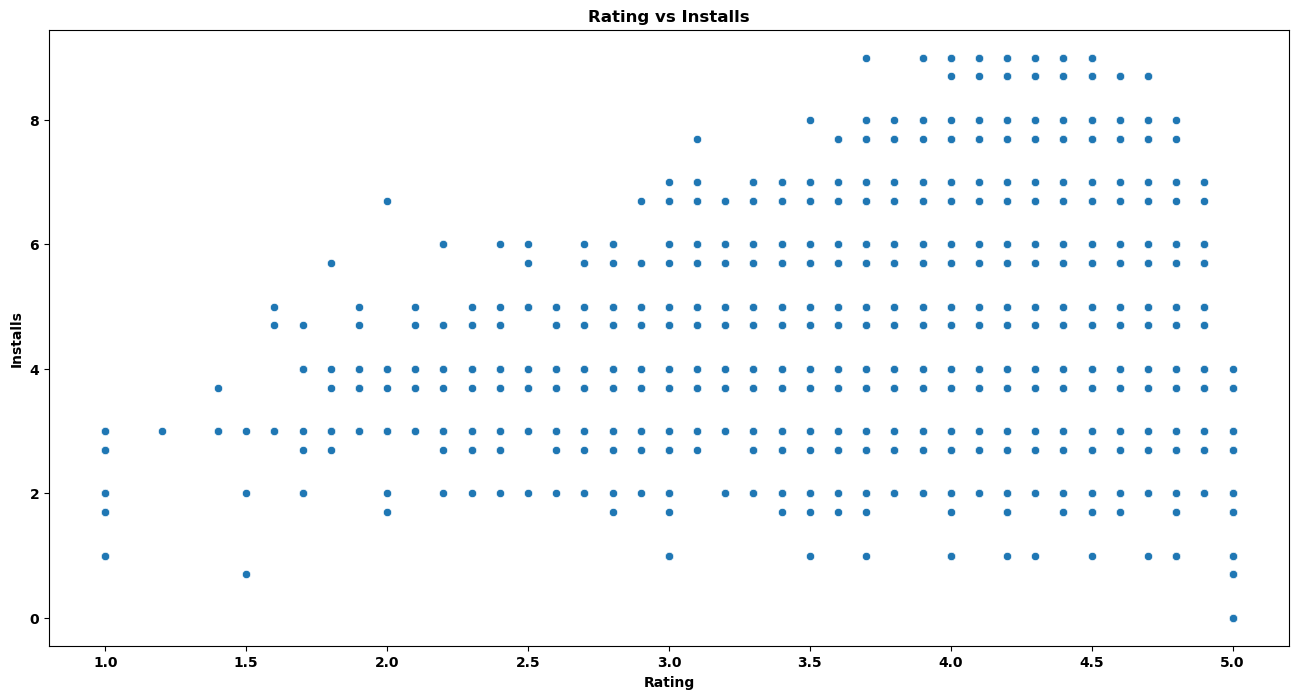

In [309]:
# plot the graph of rating vs installs
plt.figure(figsize=(16,8))
sns.scatterplot(x='Rating', y=np.log10(playstore['Installs']), data=playstore)
plt.title('Rating vs Installs')
plt.show()

# **Observations No 9**
The scatter plot of Rating vs. Installs, there appears to be a positive correlation between app ratings and the number of installs.

The data points cluster more densely in the upper-right quadrant, indicating that `apps with higher ratings generally have more installs`. As the app rating increases, the number of installs also tends to increase.

While there are `some exceptions, where lower-rated apps may have a high number of installs`, the overall trend suggests that higher-rated apps are more likely to have a larger user base and more installations.

This aligns with the intuitive understanding that users are more inclined to download and use apps that have better ratings, as the rating serves as a proxy for the app's quality and user satisfaction.

In summary, the visual pattern in the plot supports the conclusion that higher-rated apps tend to have more installs, reflecting the general preference of users to download and use apps with better ratings and reviews.



In [310]:
# What are the top 10 most installed apps in each category
Top_apps_on_google_play_store_in_each_category = playstore.groupby('Category').apply(lambda x: x.nlargest(3, 'Installs'))
Top_apps_on_google_play_store_in_each_category

App  \
Category                                                                       
ART_AND_DESIGN      3                                  Sketch - Draw & Paint   
                    12                        Tattoo Name On My Photo Editor   
                    19                                          ibis Paint X   
AUTO_AND_VEHICLES   72         Android Auto - Maps, Media, Messaging & Voice   
                    8289                       AutoScout24 - used car finder   
                    67                                    Ulysse Speedometer   
BEAUTY              117                        Beauty Camera - Selfie Camera   
                    7021                        Best Hairstyles step by step   
                    99                        ipsy: Makeup, Beauty, and Tips   
BOOKS_AND_REFERENCE 152                                    Google Play Books   
                    139                                 Wattpad 📖 Free Books   
                    143                                        Amazon Kindle   
BUSINESS            194               OfficeSuite : Free Office + PDF Editor   
                    10253             File Commander - File Manager/Explorer   
                    188                                    Indeed Job Search   
COMICS              297                           LINE WEBTOON - Free Comics   
                    311    comico Popular Original Cartoon Updated Everyd...   
                    320                                     Narrator's Voice   
COMMUNICATION       335             Messenger – Text and Video Chat for Free   
                    336                                   WhatsApp Messenger   
                    338                         Google Chrome: Fast & Secure   
DATING              482                       Zoosk Dating App: Meet Singles   
                    483                                       OkCupid Dating   
                    484                         Match™ Dating - Meet Singles   
EDUCATION           699                       Duolingo: Learn Languages Free   
                    700                                                  TED   
                    703                           Learn English with Wlingua   
ENTERTAINMENT       865                                    Google Play Games   
                    855                                              Netflix   
                    866                                              Hotstar   
EVENTS              1005                          Ticketmaster Event Tickets   
                    1008      StubHub - Tickets to Sports, Concerts & Events   
                    1009                                               Fever   
FAMILY              3975                                             Hay Day   
                    4111                                   Talking Tom Cat 2   
                    4217                                      Talking Ginger   
FINANCE             1083                                          Google Pay   
                    1076                                              PayPal   
                    1048                                              K PLUS   
FOOD_AND_DRINK      1176                                          McDonald's   
                    1178   Cookpad - FREE recipe search makes fun cooking...   
                    1183                                             Tastely   
GAME                1654                                      Subway Surfers   
                    1655                                    Candy Crush Saga   
                    1661                                        Temple Run 2   
HEALTH_AND_FITNESS  5596                                      Samsung Health   
                    1360   Period Tracker - Period Calendar Ovulation Tra...   
                    1286                      Calorie Counter - MyFitnessPal   
HOUSE_AND_HOME      1446   Zillow: Find Houses for Sale & Apartments for 

In [311]:
Top_apps_on_google_play_store_in_each_category.to_excel('Data/Top_3_apps_on_google_play_store_in_each_category.xlsx', index=False)

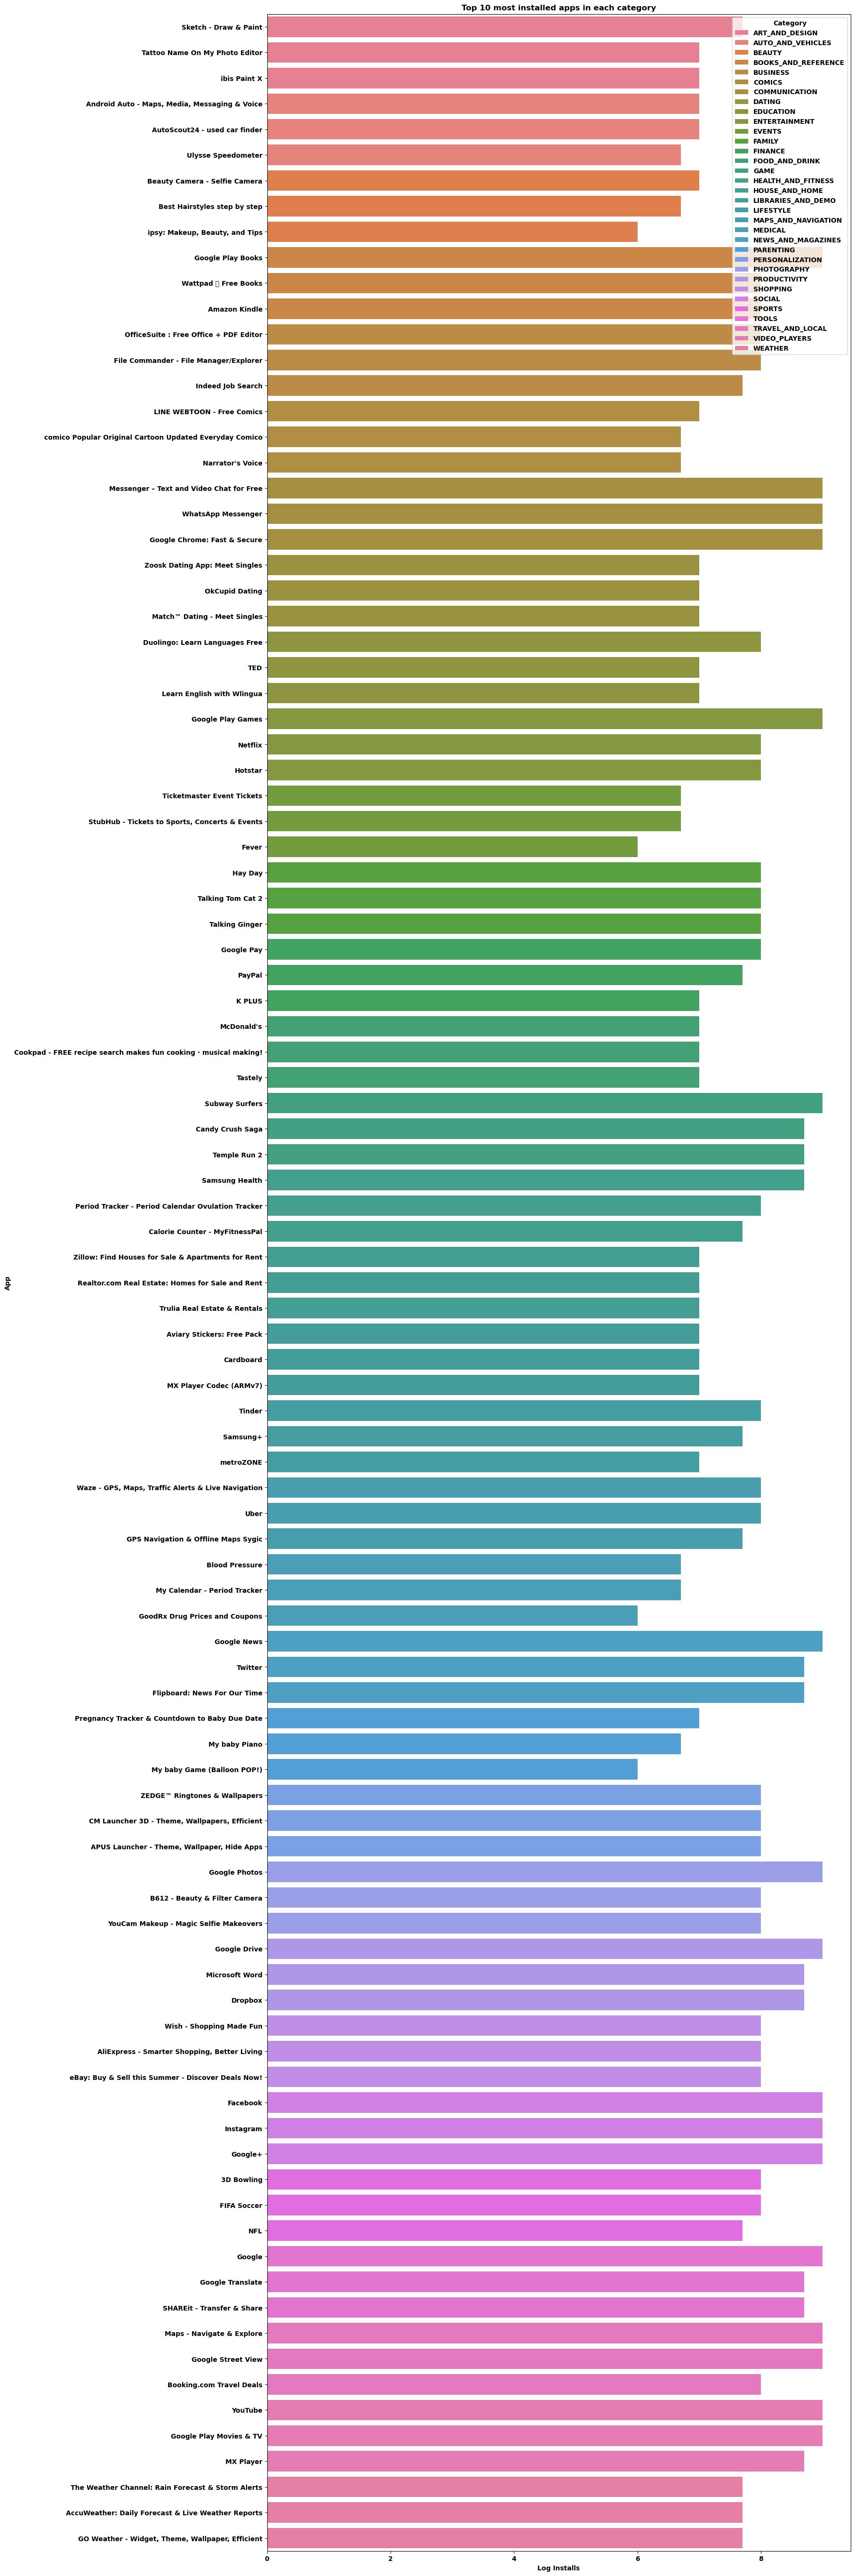

In [312]:
# plot the graph of top 10 most installed apps in each category
top_10_installed_apps = playstore.groupby('Category').apply(lambda x: x.nlargest(3, 'Installs')).reset_index(drop=True)
top_10_installed_apps['Log Installs'] = np.log10(top_10_installed_apps['Installs'])
plt.figure(figsize=(16,70))
sns.barplot(x='Log Installs', y='App', hue='Category', data=top_10_installed_apps, dodge=False)
plt.title('Top 10 most installed apps in each category')
plt.show()

# **Observations No 10**
From the above plot we can see that the top 3 apps with the highest number of installs are in each category:
## Top 3 Most Installed Apps by Category

### **ART_AND_DESIGN**
1. Sketch - Draw & Paint: 50,000,000
2. ibis Paint X: 10,000,000
3. Tattoo Name On My Photo Editor: 10,000,000

### **AUTO_AND_VEHICLES**
1. Android Auto - Maps, Media, Messaging & Voice: 10,000,000
2. AutoScout24 - used car finder: 10,000,000
3. Ulysse Speedometer: 5,000,000

### **BEAUTY**
1. Beauty Camera - Selfie Camera: 10,000,000
2. Best Hairstyles step by step: 5,000,000
3. ipsy: Makeup, Beauty, and Tips: 1,000,000

### **BOOKS_AND_REFERENCE**
1. Google Play Books: 1,000,000,000
2. Wattpad Free Books: 100,000,000
3. Amazon Kindle: 100,000,000

### **BUSINESS**
1. OfficeSuite : Free Office + PDF Editor: 100,000,000
2. File Commander - File Manager/Explorer: 100,000,000
3. Indeed Job Search: 50,000,000

### **COMICS**
1. LINE WEBTOON - Free Comics: 10,000,000
2. comico Popular Original Cartoon Updated Everyday Comico: 5,000,000
3. Narrator's Voice: 5,000,000

### **COMMUNICATION**
1. Messenger – Text and Video Chat for Free: 1,000,000,000
2. WhatsApp Messenger: 1,000,000,000
3. Google Chrome: Fast & Secure: 1,000,000,000

### **DATING**
1. Zoosk Dating App: Meet Singles: 10,000,000
2. OkCupid Dating: 10,000,000
3. Match™ Dating - Meet Singles: 10,000,000

### **EDUCATION**
1. Duolingo: Learn Languages Free: 100,000,000
2. TED: 10,000,000
3. Learn English with Wlingua: 10,000,000

### **ENTERTAINMENT**
1. Google Play Games: 1,000,000,000
2. Netflix: 100,000,000
3. Hotstar: 100,000,000

### **EVENTS**
1. Ticketmaster Event Tickets: 5,000,000
2. StubHub - Tickets to Sports, Concerts & Events: 5,000,000
3. Fever: 1,000,000

### **FINANCE**
1. Google Pay: 100,000,000
2. PayPal: 50,000,000
3. K PLUS: 10,000,000

### **FOOD_AND_DRINK**
1. McDonald's: 10,000,000
2. Cookpad - FREE recipe search makes fun cooking: 10,000,000
3. Tastely: 10,000,000

### **HEALTH_AND_FITNESS**
1. Samsung Health: 500,000,000
2. Period Tracker - Period Calendar Ovulation Tracker: 100,000,000
3. Calorie Counter - MyFitnessPal: 50,000,000

### **HOUSE_AND_HOME**
1. Zillow: Find Houses for Sale & Apartments for Rent: 10,000,000
2. Realtor.com Real Estate: Homes for Sale and Rent: 10,000,000
3. Trulia Real Estate & Rentals: 10,000,000

### **LIBRARIES_AND_DEMO**
1. Cardboard: 10,000,000
2. Aviary Stickers: Free Pack: 10,000,000
3. MX Player Codec (ARMv7): 10,000,000

### **LIFESTYLE**
1. Tinder: 100,000,000
2. Samsung+: 50,000,000
3. metroZONE: 10,000,000

### **GAME**
1. Subway Surfers: 1,000,000,000
2. Candy Crush Saga: 500,000,000
3. Temple Run 2: 500,000,000

### **FAMILY**
1. Hay Day: 100,000,000
2. Talking Tom Cat 2: 100,000,000
3. Talking Ginger: 100,000,000

### **MEDICAL**
1. My Calendar - Period Tracker: 5,000,000
2. Blood Pressure: 5,000,000
3. GoodRx Drug Prices and Coupons: 1,000,000

### **SOCIAL**
1. Facebook: 1,000,000,000
2. Instagram: 1,000,000,000
3. Google+: 1,000,000,000

### **SHOPPING**
1. Wish - Shopping Made Fun: 100,000,000
2. AliExpress - Smarter Shopping, Better Living: 100,000,000
3. eBay: Buy & Sell this Summer - Discover Deals Now!: 100,000,000

### **PHOTOGRAPHY**
1. Google Photos: 1,000,000,000
2. B612 - Beauty & Filter Camera: 100,000,000
3. YouCam Makeup - Magic Selfie Makeovers: 100,000,000

### **SPORTS**
1. 3D Bowling: 100,000,000
2. FIFA Soccer: 100,000,000
3. NFL: 50,000,000

### **TRAVEL_AND_LOCAL**
1. Maps - Navigate & Explore: 1,000,000,000
2. Google Street View: 1,000,000,000
3. Booking.com Travel Deals: 100,000,000

### **TOOLS**
1. Google: 1,000,000,000
2. Google Translate: 500,000,000
3. SHAREit - Transfer & Share: 500,000,000

### **PERSONALIZATION**
1. ZEDGE™ Ringtones & Wallpapers: 100,000,000
2. CM Launcher 3D - Theme, Wallpapers, Efficient: 100,000,000
3. APUS Launcher - Theme, Wallpaper, Hide Apps: 100,000,000

### **PRODUCTIVITY**
1. Google Drive: 1,000,000,000
2. Microsoft Word: 500,000,000
3. Dropbox: 500,000,000

### **PARENTING**
1. Pregnancy Tracker & Countdown to Baby Due Date: 10,000,000
2. My baby Piano: 5,000,000
3. My baby Game (Balloon POP!): 1,000,000

### **WEATHER**
1. The Weather Channel: Rain Forecast & Storm Alerts: 50,000,000
2. AccuWeather: Daily Forecast & Live Weather Reports: 50,000,000
3. GO Weather - Widget, Theme, Wallpaper, Efficient: 50,000,000

### **VIDEO_PLAYERS**
1. YouTube: 1,000,000,000
2. Google Play Movies & TV: 1,000,000,000
3. MX Player: 500,000,000

### **NEWS_AND_MAGAZINES**
1. Google News: 1,000,000,000
2. Twitter: 500,000,000
3. Flipboard: News For Our Time: 500,000,000

### **MAPS_AND_NAVIGATION**
1. Waze - GPS, Maps, Traffic Alerts & Live Navigation: 100,000,000
2. Uber: 100,000,000
3. GPS Navigation & Offline Maps Sygic: 50,000,000


In [313]:

playstore['Last Updated New'] = pd.to_datetime(playstore['Last Updated'])
a = playstore.groupby('Last Updated New')['Rating'].mean()
a.sort_index(ascending=False, inplace=True)
a

Last Updated New
2018-08-08    4.260000
2018-08-07    4.330303
2018-08-06    4.287273
2018-08-05    4.339024
2018-08-04    4.360976
2018-08-03    4.356327
2018-08-02    4.310000
2018-08-01    4.287437
2018-07-31    4.285714
2018-07-30    4.229730
2018-07-29    4.350000
2018-07-28    4.282609
2018-07-27    4.255000
2018-07-26    4.248333
2018-07-25    4.202459
2018-07-24    4.290476
2018-07-23    4.213402
2018-07-22    4.255556
2018-07-21    4.168421
2018-07-20    4.323881
2018-07-19    4.243678
2018-07-18    4.185556
2018-07-17    4.152055
2018-07-16    4.164103
2018-07-15    4.472222
2018-07-14    4.566667
2018-07-13    4.354839
2018-07-12    4.205556
2018-07-11    4.193590
2018-07-10    4.115789
2018-07-09    4.250000
2018-07-08    4.305556
2018-07-07    4.454545
2018-07-06    4.229787
2018-07-05    4.218841
2018-07-04    4.289744
2018-07-03    4.344928
2018-07-02    4.037500
2018-07-01    4.152381
2018-06-30    4.162500
2018-06-29    4.223810
2018-06-28    4.248485
2018-06-27    4.3

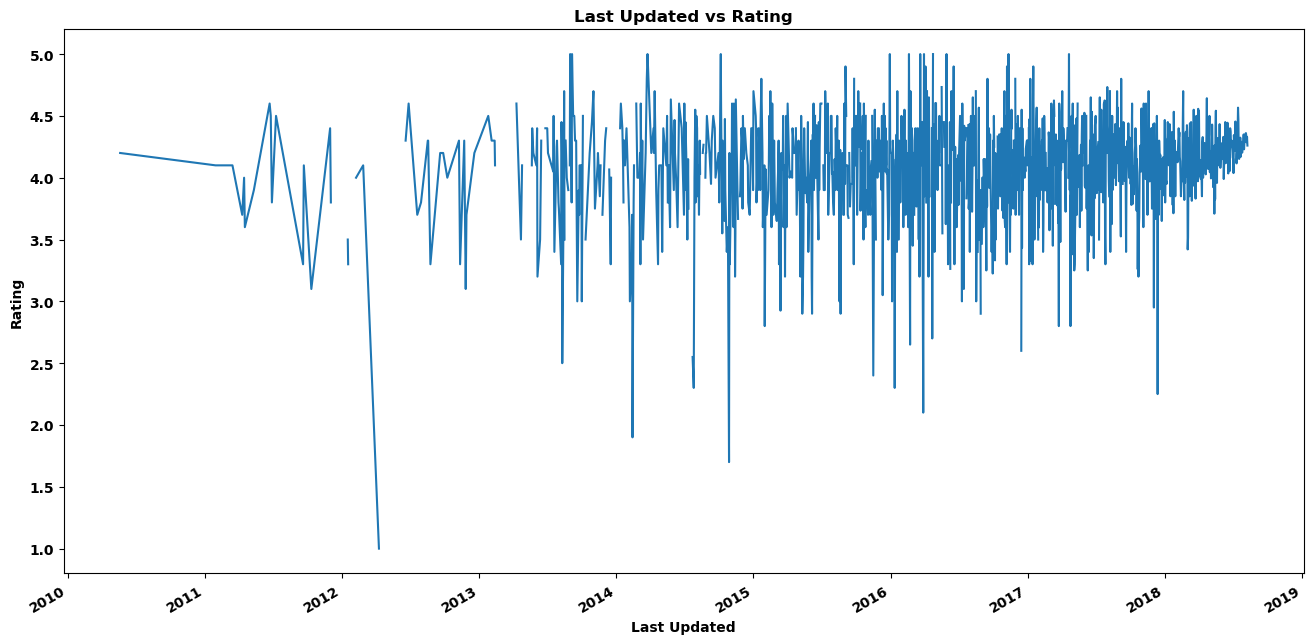

In [314]:
# Plot the graph of last updated vs rating
plt.figure(figsize=(16,8))
a.plot()
plt.xlabel('Last Updated')
plt.ylabel('Rating')
plt.title('Last Updated vs Rating')
plt.show()


# **Observations No 11**
- The graph indicates that apps updated more recently tend to have higher ratings. After a decline around 2012, ratings generally improve over time, especially from 2015 onward, suggesting a positive correlation between recent updates and higher ratings.
- The trend suggests that apps that are updated more frequently tend to have better ratings, as developers may be addressing bugs, adding new features, or improving the user experience with each update. This is consistent with the idea that regular updates can lead to higher user satisfaction and better ratings for apps.

In [315]:
a = playstore.groupby('Reviews')['Rating'].mean()
a.sort_index(ascending=False, inplace=True)
a


Reviews
78158306    4.100000
69119316    4.400000
66577313    4.500000
56642847    4.000000
44891723    4.600000
42916526    4.700000
27722264    4.500000
25655305    4.300000
24900999    4.700000
23133508    4.600000
22426677    4.400000
17712922    4.500000
17014787    4.000000
16771865    4.600000
14891223    4.500000
14198297    4.500000
13479633    4.500000
12842860    4.300000
12759663    4.500000
11667403    4.300000
11334799    4.300000
10979062    4.600000
10858556    4.500000
10790289    4.200000
10485308    4.300000
10484169    4.100000
10424925    4.100000
10216538    4.500000
10055521    4.500000
10053186    4.500000
9882639     4.600000
9881829     4.500000
9879473     4.600000
9642995     4.300000
9235155     4.300000
8923587     4.400000
8606259     4.300000
8389714     4.500000
8219586     4.400000
8190074     4.500000
8118880     4.700000
8118609     4.300000
8033493     4.400000
7820209     4.500000
7790693     4.600000
7671249     4.600000
7614130     4.400000
75945

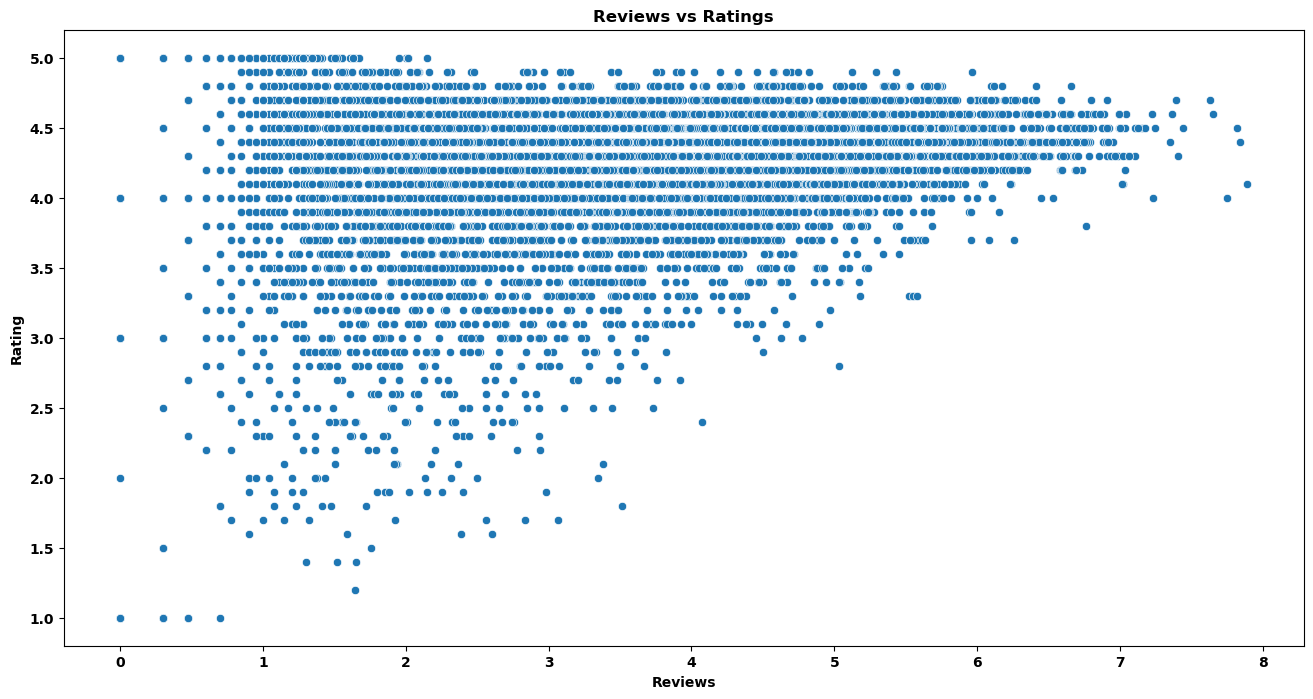

In [316]:
# plot the graph of reviews vs rating
plt.figure(figsize=(16,8))
sns.scatterplot(x=np.log10(playstore['Reviews']), y='Rating', data=playstore)
plt.title('Reviews vs Ratings')
plt.show()

# **Observations No 12**

The scatter plot of Reviews vs. Ratings, the data indicates that apps with more reviews tend to have higher ratings overall.

The plot shows a concentration of data points in the upper-right quadrant, where apps have both a high number of reviews and high ratings. As the number of reviews increases, the density of data points with higher ratings also increases.

While there are some exceptions, where apps with a low number of reviews may still have high ratings, the general trend suggests that apps with more reviews are more likely to have better user ratings.

This positive correlation between the number of reviews and app ratings makes sense intuitively. As more users interact with and provide feedback on an app, the rating tends to stabilize and converge towards a higher value, reflecting the overall quality and user satisfaction with the app.

So in summary, the visual pattern in the scatter plot supports the conclusion that apps with more reviews tend to have higher ratings compared to apps with fewer reviews.

In [317]:
playstore.groupby('Rating')['Genres'].value_counts().nlargest(20)

Rating  Genres         
4.3     Tools              78
4.2     Tools              76
4.4     Tools              65
4.1     Tools              61
4.5     Tools              57
4.3     Entertainment      50
4.6     Tools              47
        Education          46
4.4     Action             45
        Entertainment      45
4.3     Action             44
3.9     Tools              42
4.3     Communication      42
5.0     Education          42
4.5     Personalization    41
4.0     Tools              40
4.2     Entertainment      40
4.3     Education          40
4.5     Education          40
3.9     Entertainment      39
Name: count, dtype: int64

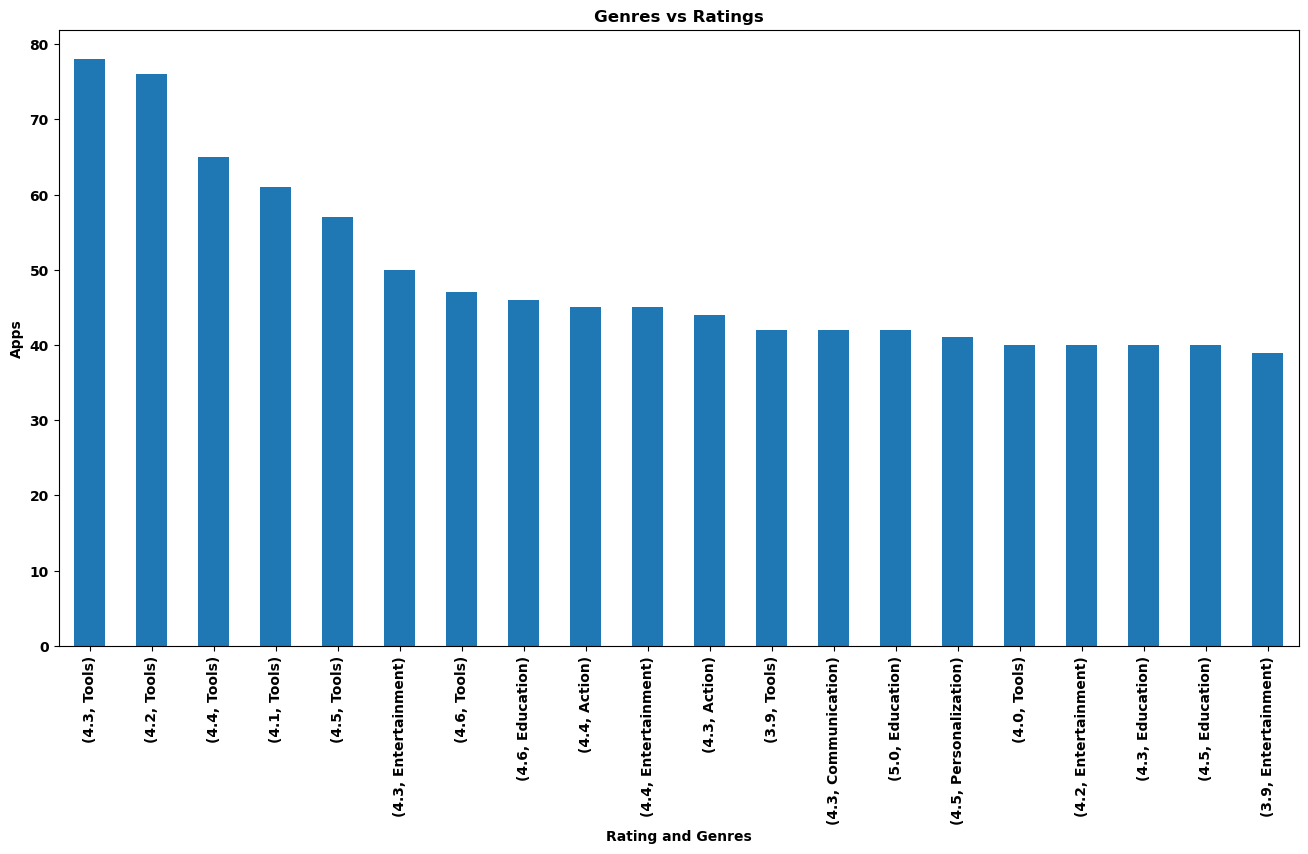

In [318]:
# plot the graph of genres vs ratings
plt.figure(figsize=(16,8))
playstore.groupby('Rating')['Genres'].value_counts().nlargest(20).plot(kind='bar')
plt.title('Genres vs Ratings')
plt.xlabel('Rating and Genres')
plt.ylabel('Apps')
plt.show()

# **Observations No 13**
- The graph shows that the most common genres for apps with the highest ratings are `Tools`, `Entertainment`, and `Education`.


In [319]:

trend = playstore.groupby('Last Updated New')['Rating'].mean().sort_index(ascending=False)
trend.to_excel('Data/Trend_in_ratings_of_apps_based_on_last_updated_date.xlsx')
trend

Last Updated New
2018-08-08    4.260000
2018-08-07    4.330303
2018-08-06    4.287273
2018-08-05    4.339024
2018-08-04    4.360976
2018-08-03    4.356327
2018-08-02    4.310000
2018-08-01    4.287437
2018-07-31    4.285714
2018-07-30    4.229730
2018-07-29    4.350000
2018-07-28    4.282609
2018-07-27    4.255000
2018-07-26    4.248333
2018-07-25    4.202459
2018-07-24    4.290476
2018-07-23    4.213402
2018-07-22    4.255556
2018-07-21    4.168421
2018-07-20    4.323881
2018-07-19    4.243678
2018-07-18    4.185556
2018-07-17    4.152055
2018-07-16    4.164103
2018-07-15    4.472222
2018-07-14    4.566667
2018-07-13    4.354839
2018-07-12    4.205556
2018-07-11    4.193590
2018-07-10    4.115789
2018-07-09    4.250000
2018-07-08    4.305556
2018-07-07    4.454545
2018-07-06    4.229787
2018-07-05    4.218841
2018-07-04    4.289744
2018-07-03    4.344928
2018-07-02    4.037500
2018-07-01    4.152381
2018-06-30    4.162500
2018-06-29    4.223810
2018-06-28    4.248485
2018-06-27    4.3

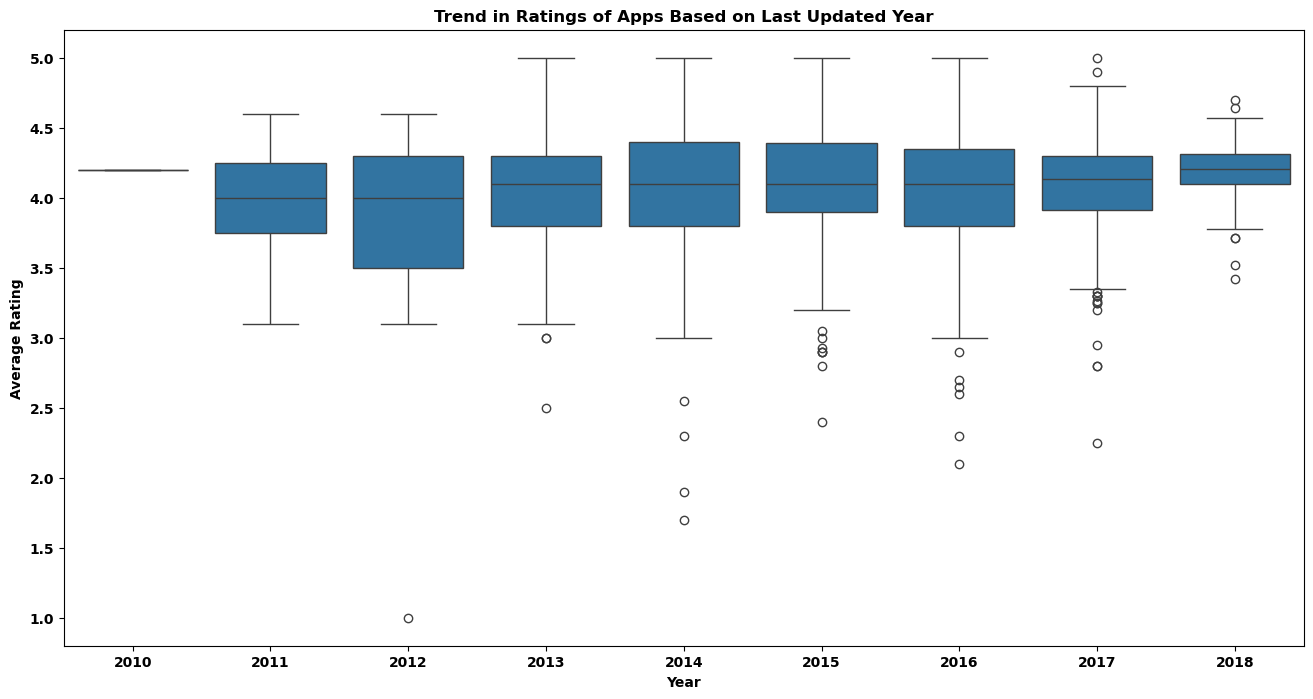

In [320]:
plt.figure(figsize=(16,8))
sns.boxplot(x=trend.index.year, y=trend.values)
plt.title('Trend in Ratings of Apps Based on Last Updated Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()



# **Observations No 14**
The trend in app ratings over time, there does appear to be an overall upward trend in the average ratings of apps as their last updated date becomes more recent.

The chart shows that the average app ratings start around 4.0 in 2010 and gradually increase over the years, reaching around 4.5 by 2018. There are some fluctuations and variations from year to year, but the general trajectory is one of increasing average ratings for apps with more recent update dates.

The steady rise in the median line, as well as the tightening of the range between the minimum and maximum ratings, indicates that newer app updates tend to receive higher ratings from users on average compared to older versions. This suggests that app developers are able to improve their products and address user feedback through regular updates, leading to enhanced user satisfaction and higher ratings over time.

In [321]:
playstore.groupby('Rating')['Size in Mb'].mean().sort_index(ascending=False)

Rating
5.0    14.095721
4.9    19.211026
4.8    19.431710
4.7    20.061989
4.6    23.640609
4.5    25.288046
4.4    25.301126
4.3    25.101309
4.2    22.730339
4.1    21.187848
4.0    21.310568
3.9    21.006722
3.8    21.364638
3.7    18.978370
3.6    21.301704
3.5    18.948633
3.4    17.338502
3.3    15.310714
3.2    13.340082
3.1    18.138697
3.0    16.559288
2.9    15.643682
2.8    17.028848
2.7    17.293620
2.6    10.557439
2.5    19.991732
2.4    14.514772
2.3    17.230000
2.2    15.528571
2.1    20.525000
2.0    17.400000
1.9    14.290909
1.8     6.133276
1.7    10.037500
1.6    16.150000
1.5    18.000000
1.4     6.733333
1.2    27.000000
1.0    14.300000
Name: Size in Mb, dtype: float64

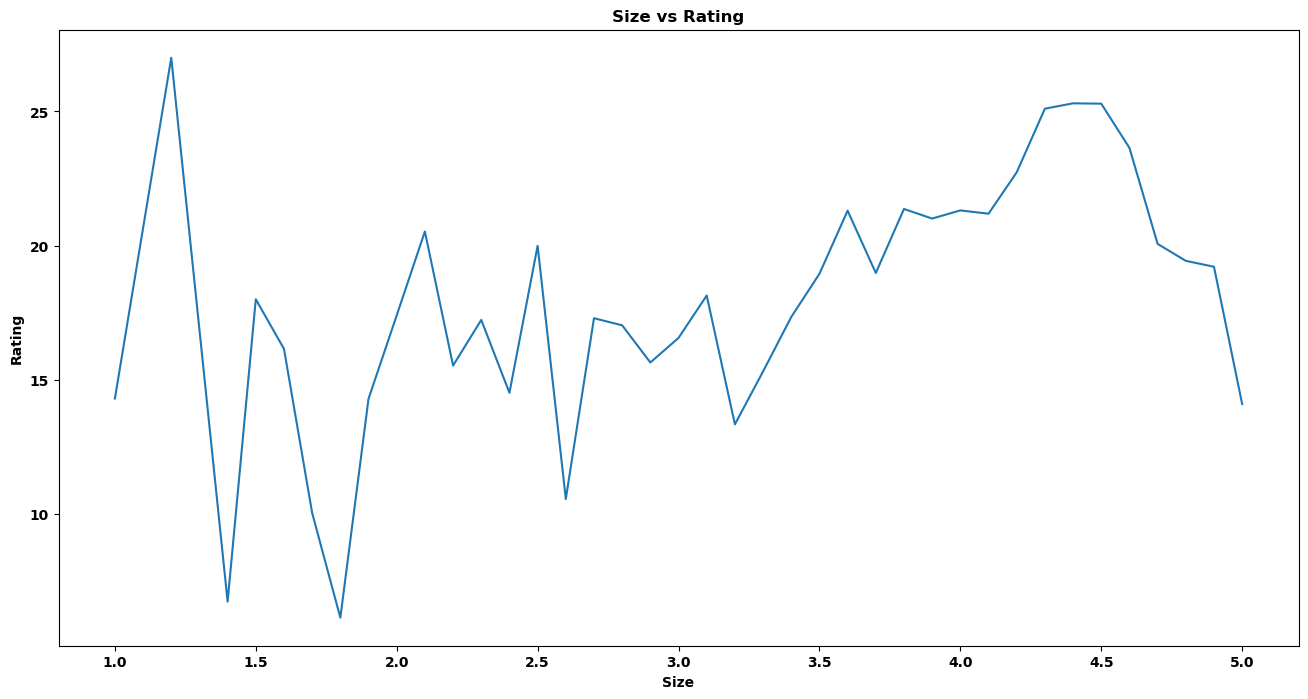

In [322]:
# plot the graph of size vs rating
plt.figure(figsize=(16,8))
playstore.groupby('Rating')['Size in Mb'].mean().sort_index(ascending=False).plot()
plt.title('Size vs Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()

# **Observations No 15**
Based on the chart, the size range with the highest associated ratings appears to be between 25M and 35M. This size range shows the highest peaks and generally higher rating values compared to smaller or larger app sizes. The chart indicates that apps in the medium size range, around 25M to 35M, tend to have the highest user ratings overall.

In [323]:
playstore[playstore['Type']=='Free']['Rating'].mean()

np.float64(4.166074015540629)

In [324]:
playstore[playstore['Type']=='Paid']['Rating'].mean()

np.float64(4.259602649006623)

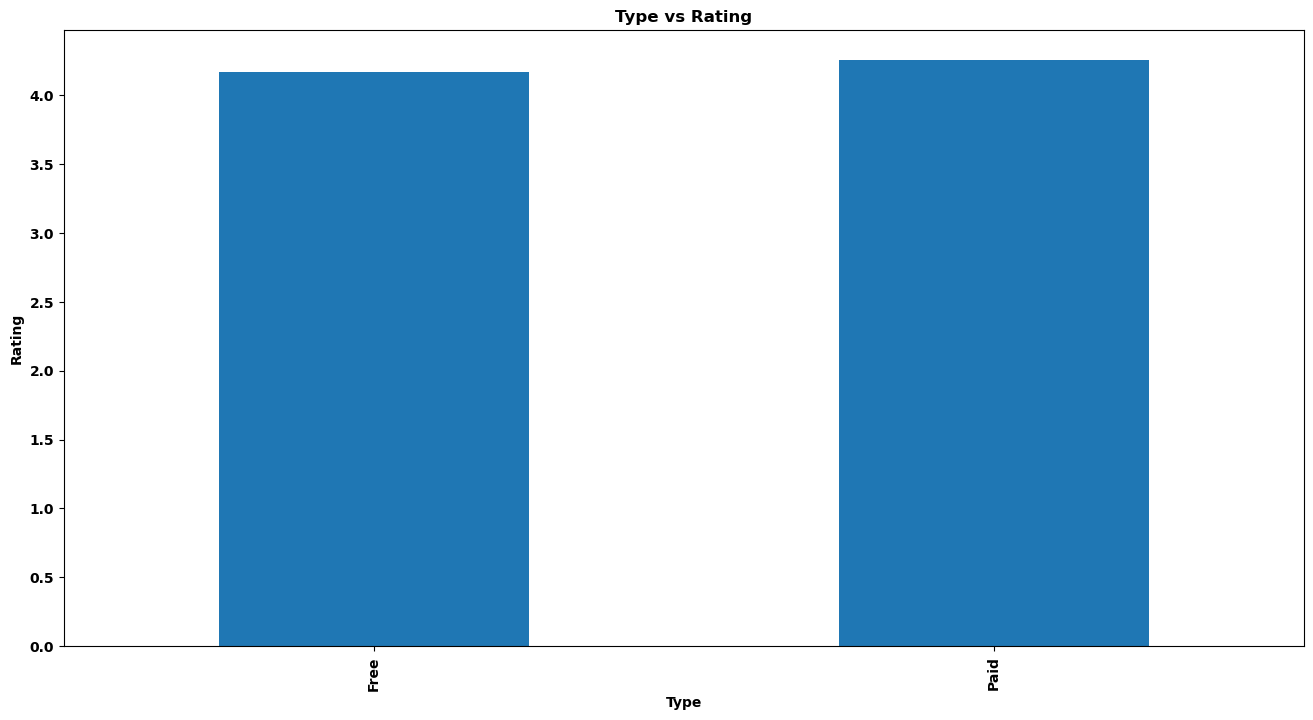

In [325]:
# plot the graph of type vs rating
plt.figure(figsize=(16,8))
playstore.groupby('Type')['Rating'].mean().plot(kind='bar')
plt.title('Type vs Rating')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.show()


# **Observations No 16**
The graph shows that the type that are most associated with higher ratings are `Paid` apps. Paid apps tend to have higher ratings compared to free apps, with a higher concentration of higher ratings in the paid category. This suggests that users may have higher expectations for paid apps and are more likely to rate them positively if they meet those expectations.

In [326]:
playstore.groupby('Rating')['Content Rating'].value_counts().sort_index(ascending=False)

Rating  Content Rating 
5.0     Teen                22
        Mature 17+          10
        Everyone 10+         2
        Everyone           237
4.9     Teen                 7
        Mature 17+           2
        Everyone 10+         1
        Everyone            75
4.8     Teen                22
        Mature 17+           6
        Everyone 10+         5
        Everyone           188
4.7     Teen                46
        Mature 17+          13
        Everyone 10+        13
        Everyone           370
4.6     Teen                72
        Mature 17+          25
        Everyone 10+        32
        Everyone           553
        Adults only 18+      1
4.5     Teen               106
        Mature 17+          31
        Everyone 10+        35
        Everyone           675
        Adults only 18+      1
4.4     Teen                98
        Mature 17+          42
        Everyone 10+        38
        Everyone           717
4.3     Teen               110
        Mature 

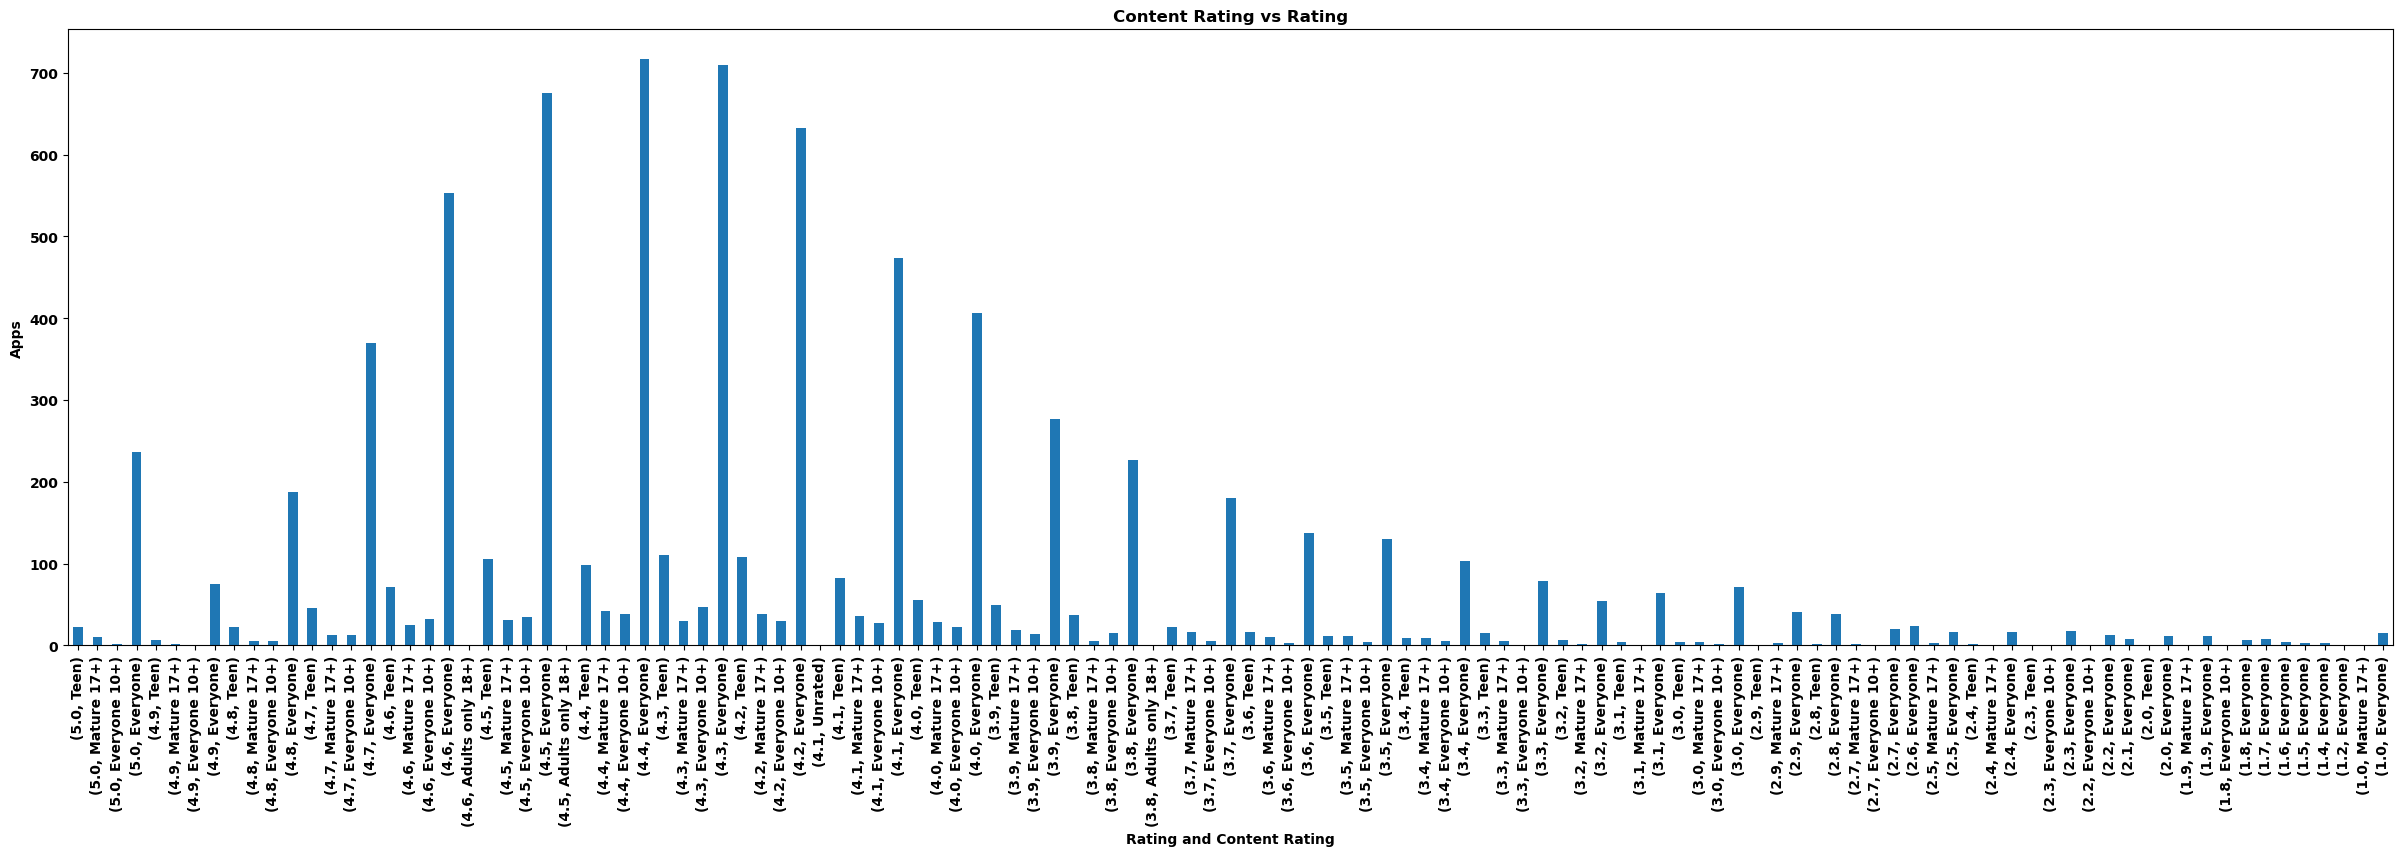

In [327]:
# plot the graph of content rating vs rating
plt.figure(figsize=(30,8))
playstore.groupby('Rating')['Content Rating'].value_counts().sort_index(ascending=False).plot(kind='bar')
plt.title('Content Rating vs Rating')
plt.xlabel('Rating and Content Rating')
plt.ylabel('Apps')
plt.show()

# **Observations No 17**
- The graph shows that the most common content rating with most associated with higher ratings is `Everyone`. Apps with an `Everyone` content rating tend to have higher ratings compared to other content ratings, with a higher concentration of higher ratings in the `Everyone` category. This suggests that apps suitable for all audiences are more likely to receive positive ratings from users.
- Second most common content rating with most associated with higher ratings is `Teen`. Apps with a `Teen` content rating also tend to have higher ratings compared to other content ratings, with a higher concentration of higher ratings in the `Teen` category. This suggests that apps suitable for teenagers are also likely to receive positive ratings from users.

In [328]:
value = playstore[playstore['Content Rating']=='Everyone']['Rating'].mean()
print(f"Average rating of apps for everyone is: {value}")

Average rating of apps for everyone is: 4.165976733645565


In [329]:
value = playstore[playstore['Content Rating']=='Everyone 10+']['Rating'].mean()
print(f"Average rating of apps for everyone 10+ is: {value}")

Average rating of apps for everyone 10+ is: 4.225901639344261


In [330]:
value = playstore[playstore['Content Rating']=='Teen']['Rating'].mean()
print(f"Average rating of apps for teen is: {value}")

Average rating of apps for teen is: 4.225657894736842


In [331]:
value = playstore[playstore['Content Rating']=='Mature 17+']['Rating'].mean()
print(f"Average rating of apps for mature 17+ is: {value}")

Average rating of apps for mature 17+ is: 4.121848739495798


In [332]:
value = playstore[playstore['Content Rating']=='Adults only 18+']['Rating'].mean()
print(f"Average rating of apps for adults only 18+ is: {value}")

Average rating of apps for adults only 18+ is: 4.3


In [333]:
value = playstore[playstore['Content Rating']=='Unrated']['Rating'].mean()
print(f"Average rating of apps for unrated is: {value}")

Average rating of apps for unrated is: 4.1


In [334]:
value = playstore["Content Rating"].unique()

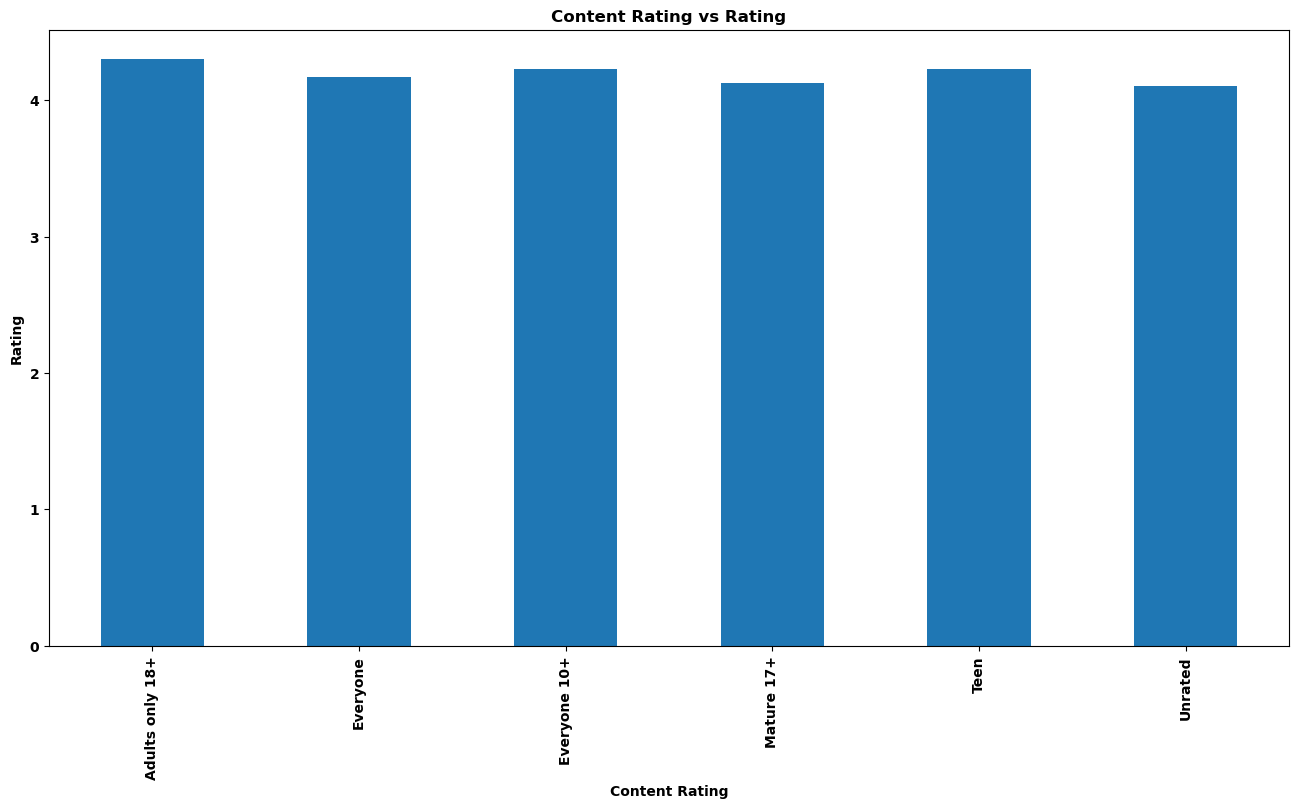

In [335]:

plt.figure(figsize=(16,8))
playstore.groupby('Content Rating')['Rating'].mean().plot(kind='bar')
plt.title('Content Rating vs Rating')
plt.xlabel('Content Rating')
plt.ylabel('Rating')
plt.show()



# **Observations No 18**
From the above graph content rating Adult only 18+ has the highest average rating of 4.3 followed by Eveyone 10+ with the average rating of 4.2259, followed by Teen with an average rating of 4.2256,followed by Mature 17+ with an average rating of 4.12, and Unrated with an average rating of 4.1.

# **Summary** 

##### 1. **How many apps are there in each category**

| **Category**         | **Number of Apps**|
|----------------------|--------------------|
| FAMILY               | 1832               |
| GAME                 | 959                |
| TOOLS                | 827                |
| BUSINESS             | 420                |
| MEDICAL              | 395                |
| PERSONALIZATION      | 376                |
| PRODUCTIVITY         | 374                |
| LIFESTYLE            | 369                |
| FINANCE              | 345                |
| SPORTS               | 325                |
| COMMUNICATION        | 315                |
| HEALTH_AND_FITNESS   | 288                |
| PHOTOGRAPHY          | 281                |
| NEWS_AND_MAGAZINES   | 254                |
| SOCIAL               | 239                |
| BOOKS_AND_REFERENCE  | 222                |
| TRAVEL_AND_LOCAL     | 219                |
| SHOPPING             | 202                |
| DATING               | 171                |
| VIDEO_PLAYERS        | 163                |
| MAPS_AND_NAVIGATION  | 131                |
| EDUCATION            | 119                |
| FOOD_AND_DRINK       | 112                |
| ENTERTAINMENT        | 102                |
| AUTO_AND_VEHICLES    | 85                 |
| LIBRARIES_AND_DEMO   | 84                 |
| WEATHER              | 79                 |
| HOUSE_AND_HOME       | 74                 |
| EVENTS               | 64                 |
| ART_AND_DESIGN       | 64                 |
| PARENTING            | 60                 |
| COMICS               | 56                 |
| BEAUTY               | 53                 |

#### 2. **How do the number of reviews correlate with app ratings**

- There is a positive correlation between the number of reviews and the app ratings. As the number of reviews increases, the app ratings tend to be higher overall.

#### 3. **Which categories take up the most space on average**

| **Category**          | **Size (in MB)**|
|-------------------|------------|
|GAME               |41.866570 MB|
|FAMILY             |27.187747 MB|
|TRAVEL_AND_LOCAL   |24.204375 MB|
|SPORTS             |24.058153 MB|
|ENTERTAINMENT      |23.043750 MB|

#### 4. **Which categories take up the least space on average**

| **Category**          | **Size (in MB)**|
|-------------------|------------|
|PRODUCTIVITY       |12.341952 MB|
|COMMUNICATION      |11.306306 MB|
|PERSONALIZATION    |11.223880 MB|
|LIBRARIES_AND_DEMO |10.598851 MB|
|TOOLS              |8.781912 MB|

#### 5. **What percentage of apps are free vs. paid**

- Free apps are more than paid apps in the dataset.Percentage of free apps is: 92.17%. Percentage of paid apps is: 7.82%

#### 6. **How does the price of an app affect the number of installs**

- The apps with higher prices tend to have fewer installs, while the apps with lower prices tend to have more installs.The apps with prices between 0 dollars have average 8430545 number of installs and The apps with prices between 200 and 400 dollars have average 12888 number of installs.

#### 7. **How do content ratings vary across different app categories?**

- The most common content rating is `Everyone` with 7904 apps,  followed by `Teen` with 1036 apps, followed by `Mature 17+` with 393 apps, followed by `Everyone 10+` with 322 apps followed by `Adults only 18+` with 3 apps followed by `Unrated` with 2 apps.

#### 8. **#Do higher-rated apps tend to have more installs?**

- The scatter plot of Rating vs. Installs, there appears to be a positive correlation between app ratings and the number of installs. The data points cluster more densely in the upper-right quadrant, indicating that apps with higher ratings generally have more installs.

#### 9. **What are the top 3 most installed apps in each category**

### **ART_AND_DESIGN**
1. Sketch - Draw & Paint: 50,000,000
2. ibis Paint X: 10,000,000
3. Tattoo Name On My Photo Editor: 10,000,000

### **AUTO_AND_VEHICLES**
1. Android Auto - Maps, Media, Messaging & Voice: 10,000,000
2. AutoScout24 - used car finder: 10,000,000
3. Ulysse Speedometer: 5,000,000

### **BEAUTY**
1. Beauty Camera - Selfie Camera: 10,000,000
2. Best Hairstyles step by step: 5,000,000
3. ipsy: Makeup, Beauty, and Tips: 1,000,000

### **BOOKS_AND_REFERENCE**
1. Google Play Books: 1,000,000,000
2. Wattpad Free Books: 100,000,000
3. Amazon Kindle: 100,000,000

### **BUSINESS**
1. OfficeSuite : Free Office + PDF Editor: 100,000,000
2. File Commander - File Manager/Explorer: 100,000,000
3. Indeed Job Search: 50,000,000

### **COMICS**
1. LINE WEBTOON - Free Comics: 10,000,000
2. comico Popular Original Cartoon Updated Everyday Comico: 5,000,000
3. Narrator's Voice: 5,000,000

### **COMMUNICATION**
1. Messenger – Text and Video Chat for Free: 1,000,000,000
2. WhatsApp Messenger: 1,000,000,000
3. Google Chrome: Fast & Secure: 1,000,000,000

### **DATING**
1. Zoosk Dating App: Meet Singles: 10,000,000
2. OkCupid Dating: 10,000,000
3. Match™ Dating - Meet Singles: 10,000,000

### **EDUCATION**
1. Duolingo: Learn Languages Free: 100,000,000
2. TED: 10,000,000
3. Learn English with Wlingua: 10,000,000

### **ENTERTAINMENT**
1. Google Play Games: 1,000,000,000
2. Netflix: 100,000,000
3. Hotstar: 100,000,000

### **EVENTS**
1. Ticketmaster Event Tickets: 5,000,000
2. StubHub - Tickets to Sports, Concerts & Events: 5,000,000
3. Fever: 1,000,000

### **FINANCE**
1. Google Pay: 100,000,000
2. PayPal: 50,000,000
3. K PLUS: 10,000,000

### **FOOD_AND_DRINK**
1. McDonald's: 10,000,000
2. Cookpad - FREE recipe search makes fun cooking: 10,000,000
3. Tastely: 10,000,000

### **HEALTH_AND_FITNESS**
1. Samsung Health: 500,000,000
2. Period Tracker - Period Calendar Ovulation Tracker: 100,000,000
3. Calorie Counter - MyFitnessPal: 50,000,000

### **HOUSE_AND_HOME**
1. Zillow: Find Houses for Sale & Apartments for Rent: 10,000,000
2. Realtor.com Real Estate: Homes for Sale and Rent: 10,000,000
3. Trulia Real Estate & Rentals: 10,000,000

### **LIBRARIES_AND_DEMO**
1. Cardboard: 10,000,000
2. Aviary Stickers: Free Pack: 10,000,000
3. MX Player Codec (ARMv7): 10,000,000

### **LIFESTYLE**
1. Tinder: 100,000,000
2. Samsung+: 50,000,000
3. metroZONE: 10,000,000

### **GAME**
1. Subway Surfers: 1,000,000,000
2. Candy Crush Saga: 500,000,000
3. Temple Run 2: 500,000,000

### **FAMILY**
1. Hay Day: 100,000,000
2. Talking Tom Cat 2: 100,000,000
3. Talking Ginger: 100,000,000

### **MEDICAL**
1. My Calendar - Period Tracker: 5,000,000
2. Blood Pressure: 5,000,000
3. GoodRx Drug Prices and Coupons: 1,000,000

### **SOCIAL**
1. Facebook: 1,000,000,000
2. Instagram: 1,000,000,000
3. Google+: 1,000,000,000

### **SHOPPING**
1. Wish - Shopping Made Fun: 100,000,000
2. AliExpress - Smarter Shopping, Better Living: 100,000,000
3. eBay: Buy & Sell this Summer - Discover Deals Now!: 100,000,000

### **PHOTOGRAPHY**
1. Google Photos: 1,000,000,000
2. B612 - Beauty & Filter Camera: 100,000,000
3. YouCam Makeup - Magic Selfie Makeovers: 100,000,000

### **SPORTS**
1. 3D Bowling: 100,000,000
2. FIFA Soccer: 100,000,000
3. NFL: 50,000,000

### **TRAVEL_AND_LOCAL**
1. Maps - Navigate & Explore: 1,000,000,000
2. Google Street View: 1,000,000,000
3. Booking.com Travel Deals: 100,000,000

### **TOOLS**
1. Google: 1,000,000,000
2. Google Translate: 500,000,000
3. SHAREit - Transfer & Share: 500,000,000

### **PERSONALIZATION**
1. ZEDGE™ Ringtones & Wallpapers: 100,000,000
2. CM Launcher 3D - Theme, Wallpapers, Efficient: 100,000,000
3. APUS Launcher - Theme, Wallpaper, Hide Apps: 100,000,000

### **PRODUCTIVITY**
1. Google Drive: 1,000,000,000
2. Microsoft Word: 500,000,000
3. Dropbox: 500,000,000

### **PARENTING**
1. Pregnancy Tracker & Countdown to Baby Due Date: 10,000,000
2. My baby Piano: 5,000,000
3. My baby Game (Balloon POP!): 1,000,000

### **WEATHER**
1. The Weather Channel: Rain Forecast & Storm Alerts: 50,000,000
2. AccuWeather: Daily Forecast & Live Weather Reports: 50,000,000
3. GO Weather - Widget, Theme, Wallpaper, Efficient: 50,000,000

### **VIDEO_PLAYERS**
1. YouTube: 1,000,000,000
2. Google Play Movies & TV: 1,000,000,000
3. MX Player: 500,000,000

### **NEWS_AND_MAGAZINES**
1. Google News: 1,000,000,000
2. Twitter: 500,000,000
3. Flipboard: News For Our Time: 500,000,000

### **MAPS_AND_NAVIGATION**
1. Waze - GPS, Maps, Traffic Alerts & Live Navigation: 100,000,000
2. Uber: 100,000,000
3. GPS Navigation & Offline Maps Sygic: 50,000,000

#### 10. **Do apps that have been updated more recently tend to have higher ratings?**

- The graph indicates that apps updated more recently tend to have higher ratings. After a decline around 2012, ratings generally improve over time, especially from 2015 onward, suggesting a positive correlation between recent updates and higher ratings.

#### 11. **Do apps with more reviews tend to have higher ratings?**

- The data indicates that apps with more reviews tend to have higher ratings overall.

#### 12. **Which genres are most associated with higher ratings?**

- The data shows that the most common genres for apps with the highest ratings are `Tools`, `Entertainment`, and `Education`.

#### 13. **Is there a trend in the ratings of apps based on their last updated date?**

- The trend in app ratings over time, there does appear to be an overall upward trend in the average ratings of apps as their last updated date becomes more recent.

#### 14. **What size range is most associated with higher ratings?**

- The size range with the highest associated ratings appears to be between 25M and 35M. This size range shows the highest peaks and generally higher rating values compared to smaller or larger app sizes.

#### 15. **What type are most associated with higher ratings?**

- The type that are most associated with higher ratings are `Paid` apps. Paid apps tend to have higher ratings compared to free apps, with a higher concentration of higher ratings in the paid category.

#### 16. **What content ratings are most associated with higher ratings?**

- The most common content rating with most associated with higher ratings is `Everyone`. Apps with an `Everyone` content rating tend to have higher ratings compared to other content ratings, with a higher concentration of higher ratings in the `Everyone` category.

#### 17. **What is the average rating for each content rating?**

- The content rating Adult only 18+ has the highest average rating of 4.3 followed by Eveyone 10+ with the average rating of 4.2259, followed by Teen with an average rating of 4.2256,followed by Mature 17+ with an average rating of 4.12, and Unrated with an average rating of 4.1.

# **Conclusion**

- The dataset contains information about various apps available on the Google Play Store, including details such as app category, rating, reviews, size, installs, price, content rating, genres, last updated date, current version, and Android version requirements.

- The analysis of the dataset has provided insights into the relationships between different variables and how they impact app ratings, installs, and user preferences.

- The findings suggest that factors such as the number of reviews, app size, price, content rating, last updated date, and app category can influence app ratings and user engagement.




